# **PROYECTO DATA SCIENCE - INVENTARIOS NUTRELEC**

En este proyecto se analiza el resultado de los inventarios físicos de la compañía NUTRELUC realizados de enero a agosto de 2023 para el 100% de los materiales resguardados en sus nueve almacenes. Con lo anterior, se busca conocer la cantidad de cajas que se tendrán en los próximos inventarios.

NUTRELEC cuenta con dos plantas donde se fabrican golosinas tipo chocolate, mezclas de nueces y bebidas instantáneas en polvo, con comercialización a nivel Nacional e Internacional en los canales Retail e Industrial. En el dataset utilizado para este proyecto "Inventarios_2023" se consolidan los datos: Planta, Almacen, Material, Descripción, Caducidad, Lote, Estatus, Categoria, Proyección, Mercado, Categoría, Cajas, Costo y Vida útil, entre otros.

Con la información suministrada se estudia, a través de diversas visualizaciones y cálculos, el compartamiento de la variable target "TOTAL_CJ", se describen sus caractéristicas generales, distribución, medidas de posición y se determina si existen outliers que desvirtuan los resultados futuros de la predicción. Con los resultados, se sabe que el estatus libre utilización es el que tiene la mayor participación en el dataset con un 97%, seguido del producto con corta caducidad con 1.6%. El producto industrial es el que tiene mayor presencia en los estatus de riesgo corta caducidad y dañado. En general se identificó que hay muy pocos productos con inventarios altos, el 50% del inventario tiene una existencia menor a 50 cajas.

Adicionalmente resultado de este análisis se delimitaron los datos a estudiar durante el proyecto, definiendo así que se utilzará a lo largo del proyecto la variable target trasformada: "TOTAL_CJ_Topeada en su forma logarítmica".

Posteriormente, se analiza la relación de la variable target trasformada log vs las features, con esto se determina que las variables cuantitativas COSTO_TOT, AN_CAD, MESES_VU son las más correlacionadas con el target, siendo el COSTO_TOT la que presenta la relación más fuerte con una correlación del 90%.

# OBJETIVO
Predecir la cantidad de cajas por estatus que se tendrán en próximos inventarios.

# CONTEXTO COMERCIAL
La empresa NUTRELEC realiza mensualmente inventarios a sus almacenes con el objetivo de monitorear la integridad de sus productos y ofrecer a sus clientes un abastecimiento eficiente acorde sus requerimientos y necesidades. Estos inventarios le ayudan a detectar fallas durante el almacenamiento y distribución, sin embargo en los últimos meses ha tenido un incremento en la cantidad de cajas de producto caducado, por lo cual se necesita predecir el comportamiento futuro de sus inventarios a fin de tomar acciones y prevenir la generación de merma. Para ello es muy útil conocer la "cantidad de cajas posible por estatus" que dependa de los atributos del inventario, sería de gran valor contar con una estimación automática para dejar de lado las suposiciones de los coordinadores de los almacenes.

# PROBLEMA COMERCIAL
Al no contar con un estimado de cajas por estatus, es muy difícil prevenir la obsolescencia. Por ello se requiere predecir la generación de cajas por estatus a partir de información de inventarios pasados para que se de visibilidad al almacen y se tomen acciones oportunas.

# CONTEXTO ANALITICO

Para poder desarrollar el modelo se cuenta con un conjunto de 8 inventarios realizados a final de cada mes durante el 2023.

Las variables disponibles (30) son las siguientes:

0	FECHA - Fecha de inventario
1	CEDI_MAT - Unión texto Cedi y Material
2	CEDI_MAT_LOT - Unión texto Cedi, Material y Lote
3	CEDI_MAT_LOT_EST - Unión texto Cedi, Material, Lote y Estatus
4	PLANTA - Planta fabricante
5	ALMACEN - Nombre del almacén
6	CEDI - Identificador del almacén
7	MATERIAL - Identificador del producto
8	DESCRIPCION - Descripción del producto
9	CADUCIDAD - Fecha de caducidad
10	LOTE - Identificador del lote
11	ESTATUS - Clasificación de estado del producto
12  MES_CAD	 - Mes de caducidad
13	AN_CAD	- Año de caducidad
14	CATEGORIA - Categoría del producto
15	NOM	- Cumplimiento del etiquetado
16  FORM - Estatus descontinuado
17  RF_12M - Proyección de venta a 12 meses
18  M_NACIONAL	- Se comercializa en mercado nacional
19  CATEGORIA_FIN - Categoría de riesgo
20  RESPONSABLE	- Responsable del riesgo
21  ACCION - Acciones sobre el riesgo
22  TOTAL_CJ - Cantidad del cajas
23  COSTO_UN - Costo por caja
24  COSTO_TOT - Costo por total del inventario
25	MESES_VU - Vida útil restante en meses
26  VU_MAX -	Meses de vida útil máximos
27	PRCNTJ_VU - Vida útil restante en porcentaje
28	UN_CJ	- Cantidad de unidades por caja
29  RF_MES - Proyección de venta siguiente mes

In [110]:
# Carga de Librerias a utilizar
import pandas as pd
# Para importar base desde Github
import requests
from io import BytesIO
import openpyxl
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# Para dar formato a gráficos
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats
# Para trabajar con dates
from datetime import timedelta
# Para estimar regresión
import statsmodels.formula.api as sm
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Para métricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Para forward selection
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Para PCA
from sklearn.decomposition import PCA
# Para separar en train y test
from sklearn.model_selection import train_test_split
# Para estandarizar la data
from sklearn.preprocessing import StandardScaler
# Para seteo que no se muestre en notación científica
np.set_printoptions(suppress=True)

In [109]:
# Carga del dataset desde Github
url = 'https://raw.githubusercontent.com/Moon-Her/Proyecto_DS_Inventario/main/Inventarios_2023.xlsx'
response = requests.get(url)
content = response.content
df = pd.read_excel(BytesIO(content))
df.head()

FECHA     CEDI_MAT         CEDI_MAT_LOT  \
0 2023-01-31  NU901008121  NU90100812147003987   
1 2023-01-31  NU901011425      NU9010114251322   
2 2023-01-31  NU901011425      NU9010114251322   
3 2023-01-31  NU901011425      NU9010114250344   
4 2023-01-31  NU901011425      NU9010114251422   

                       CEDI_MAT_LOT_EST PLANTA  CEDI ALMACEN  MATERIAL  \
0  NU90100812147003987Libre utilización   ABNU  NU90     LAG   1008121   
1        NU9010114251322Corta caducidad   ABNU  NU90     LAG   1011425   
2                 NU9010114251322Dañado   ABNU  NU90     LAG   1011425   
3                 NU9010114250344Dañado   ABNU  NU90     LAG   1011425   
4        NU9010114251422Corta caducidad   ABNU  NU90     LAG   1011425   

                           DESCRIPCION  CADUCIDAD  ... RESPONSABLE  \
0  MUIBON avell 24/15/22g.Display Exp. 2024-04-01  ...   Comercial   
1     BRR. MILCH AVELL  1/250/22G 4605 2023-06-30  ...   Sebastián   
2     BRR. MILCH AVELL  1/250/22G 4605 2023-06-30  ...       Oscar   
3     BRR. MILCH AVELL  1/250/22G 4605 2023-07-07  ...       Oscar   
4     BRR. MILCH AVELL  1/250/22G 4605 2023-07-07  ...   Sebastián   

          ACCION TOTAL_CJ  COSTO_UN COSTO_TOT   MESES_VU     VU_MAX  PRCTJ_VU  \
0  Venta regular      200    465.36  93072.00  14.200000  15.000000  0.946667   
1    Para planes       32    298.36   9547.52   5.000000  15.233333  0.328228   
2          Merma        1    298.36    298.36   5.000000  15.233333  0.328228   
3          Merma        2    298.36    596.72   5.233333  15.233333  0.343545   
4    Para planes       21    298.36   6265.56   5.233333  15.233333  0.343545   

   UN_CJ RF_MES  
0   24.0   70.0  
1    1.0    0.0  
2    1.0    0.0  
3    1.0    0.0  
4    1.0    0.0  

[5 rows x 30 columns]

# EXPLORACIÓN DEL DATASET

In [111]:
df.shape

(34672, 30)

In [112]:
# ¿Hay filas duplicadas?
df.duplicated().value_counts()

False    34670
True         2
dtype: int64

In [113]:
# ¿Qué tipo de datos tiene el dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34672 entries, 0 to 34671
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FECHA             34672 non-null  datetime64[ns]
 1   CEDI_MAT          34672 non-null  object        
 2   CEDI_MAT_LOT      34672 non-null  object        
 3   CEDI_MAT_LOT_EST  34672 non-null  object        
 4   PLANTA            34672 non-null  object        
 5   CEDI              34672 non-null  object        
 6   ALMACEN           34337 non-null  object        
 7   MATERIAL          34672 non-null  int64         
 8   DESCRIPCION       34672 non-null  object        
 9   CADUCIDAD         34672 non-null  datetime64[ns]
 10  LOTE              34672 non-null  object        
 11  ESTATUS           34672 non-null  object        
 12  MES_CAD           34672 non-null  object        
 13  AN_CAD            34672 non-null  int64         
 14  CATEGORIA         3467

In [114]:
# Convertir variables según su tipo de dato real, se usaran números sin decimales
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['MATERIAL'] = df['MATERIAL'].astype(str)
df['CADUCIDAD'] = pd.to_datetime(df['CADUCIDAD'])
#df['NOM'] = df['NOM'].astype(bool)
#df['FORM'] = df['FORM'].astype(bool)
#df['RF_12M'] = df['RF_12M'].astype(bool)
#df['M_NACIONAL'] = df['M_NACIONAL'].astype(bool)
df['RF_MES'] = df['RF_MES'].astype(int)


In [115]:
df.columns

Index(['FECHA', 'CEDI_MAT', 'CEDI_MAT_LOT', 'CEDI_MAT_LOT_EST', 'PLANTA',
       'CEDI', 'ALMACEN', 'MATERIAL', 'DESCRIPCION', 'CADUCIDAD', 'LOTE',
       'ESTATUS', 'MES_CAD', 'AN_CAD', 'CATEGORIA', 'NOM', 'FORM', 'RF_12M',
       'M_NACIONAL', 'CATEGORIA_FIN', 'RESPONSABLE', 'ACCION', 'TOTAL_CJ',
       'COSTO_UN', 'COSTO_TOT', 'MESES_VU', 'VU_MAX', 'PRCTJ_VU', 'UN_CJ',
       'RF_MES'],
      dtype='object')

In [116]:
# Identificar datos 0
nun_missing = (df[['FECHA', 'CEDI_MAT', 'CEDI_MAT_LOT', 'CEDI_MAT_LOT_EST', 'PLANTA',
       'ALMACEN', 'CEDI', 'MATERIAL', 'DESCRIPCION', 'CADUCIDAD', 'LOTE',
       'ESTATUS', 'MES_CAD', 'AN_CAD', 'CATEGORIA', 'NOM', 'FORM', 'RF_12M',
       'M_NACIONAL', 'CATEGORIA_FIN', 'RESPONSABLE', 'ACCION', 'TOTAL_CJ',
       'COSTO_UN', 'COSTO_TOT', 'MESES_VU', 'VU_MAX', 'PRCTJ_VU', 'UN_CJ',
       'RF_MES']] == 0).sum()
print(nun_missing)

FECHA                   0
CEDI_MAT                0
CEDI_MAT_LOT            0
CEDI_MAT_LOT_EST        0
PLANTA                  0
ALMACEN                 0
CEDI                    0
MATERIAL                0
DESCRIPCION             0
CADUCIDAD               0
LOTE                    0
ESTATUS                 0
MES_CAD                 0
AN_CAD                  0
CATEGORIA               0
NOM                  3743
FORM                30859
RF_12M              31639
M_NACIONAL           3043
CATEGORIA_FIN           0
RESPONSABLE             0
ACCION                  0
TOTAL_CJ                1
COSTO_UN                0
COSTO_TOT               1
MESES_VU               21
VU_MAX                  0
PRCTJ_VU               21
UN_CJ                   0
RF_MES               5769
dtype: int64


Para las variables: NOM, FORM, RF_12M, M_NACIONAL, MESES_VU, PRCTJ_VU, RF_MES, es esperado que existan valores con 0, no así para TOTAL_CJ y COSTO_TOT. Por lo tanto eliminaré los 0 en estos casos.

In [117]:
# Remplazar '0' con valores 'nan' en columnas cuya información no debería ser 0
df[['TOTAL_CJ','COSTO_TOT']] = df[['TOTAL_CJ','COSTO_TOT']].replace(0, np.nan)
# Contar el número de valores 'nan'en cada columna
print(df.isnull().sum())

FECHA                 0
CEDI_MAT              0
CEDI_MAT_LOT          0
CEDI_MAT_LOT_EST      0
PLANTA                0
CEDI                  0
ALMACEN             335
MATERIAL              0
DESCRIPCION           0
CADUCIDAD             0
LOTE                  0
ESTATUS               0
MES_CAD               0
AN_CAD                0
CATEGORIA             0
NOM                   0
FORM                  0
RF_12M                0
M_NACIONAL            0
CATEGORIA_FIN         0
RESPONSABLE           0
ACCION                0
TOTAL_CJ              1
COSTO_UN              0
COSTO_TOT             1
MESES_VU              0
VU_MAX                0
PRCTJ_VU              0
UN_CJ                 0
RF_MES                0
dtype: int64


In [118]:
# Remover filas con 'na'
df.dropna(inplace=True)

In [119]:
df.describe().round(0)

AN_CAD      NOM     FORM   RF_12M  M_NACIONAL  TOTAL_CJ  COSTO_UN  \
count  34336.0  34336.0  34336.0  34336.0     34336.0   34336.0   34336.0   
mean    2025.0      1.0      0.0      0.0         1.0     175.0     673.0   
std        1.0      0.0      0.0      0.0         0.0     478.0    2400.0   
min     2018.0      0.0      0.0      0.0         0.0       1.0      32.0   
25%     2024.0      1.0      0.0      0.0         1.0       3.0     130.0   
50%     2025.0      1.0      0.0      0.0         1.0      35.0     152.0   
75%     2026.0      1.0      0.0      0.0         1.0     157.0     351.0   
max     2026.0      1.0      1.0      1.0         1.0   21002.0   22320.0   

       COSTO_TOT  MESES_VU   VU_MAX  PRCTJ_VU    UN_CJ   RF_MES  
count    34336.0   34336.0  34336.0   34336.0  34336.0  34336.0  
mean     40044.0      22.0     27.0       1.0     19.0   1044.0  
std     117044.0      13.0     11.0       0.0     43.0   2066.0  
min         80.0     -59.0      9.0      -3.0      1.0      0.0  
25%        811.0      11.0     15.0       1.0      4.0     25.0  
50%       8428.0      26.0     37.0       1.0     12.0    225.0  
75%      31416.0      35.0     37.0       1.0     16.0   1120.0  
max    3570340.0      37.0     37.0       1.0    405.0  20085.0

# VISUALIZACIONES GENERALES DEL TARGET

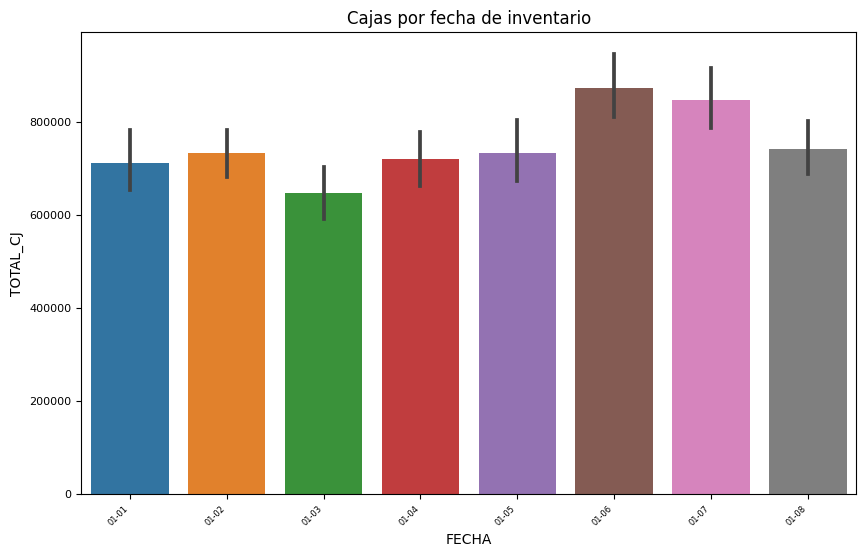

In [120]:
# ¿Qué cantidad de cajas conforman los inventarios del dataset?
## Gráfico de barras cajas por fecha de inventario
plt.figure(figsize=(10, 6))
sns.barplot(data=df,
               x='FECHA',
               y='TOTAL_CJ',
               estimator=sum)
plt.title('Cajas por fecha de inventario')
plt.xticks(rotation=45, ha='right',fontsize=6)
plt.yticks(fontsize=8)
date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.show()

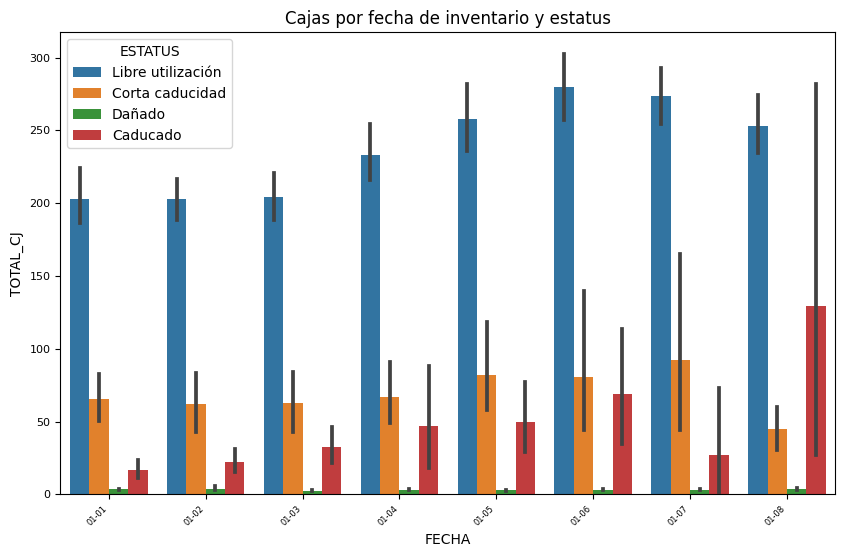

In [121]:
# ¿Qué cantidad de cajas hay por estatus?
## Gráfico de barras Cajas por fecha de inventario y estatus
plt.figure(figsize=(10, 6))
sns.barplot(data=df,
            x='FECHA',
            y='TOTAL_CJ',
            hue='ESTATUS')
plt.title('Cajas por fecha de inventario y estatus')
plt.xticks(rotation=45, ha='right',fontsize=6)
plt.yticks(fontsize=8)
date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.show()

El 97.5% del inventario se encuentra en libre utilización, el producto caducado incrementan de forma importante mes a mes y la presencia de producto en corta caducidad se mantiene estática, lo que nos indica que la venta del producto con baja vida útil se complica y levanta una alerta por la posible generación de más producto caducado.


Con esta visualización se aprecia que la mayor parte del inventario se encuentra disponible para la venta en los 8 inventarios, sin embargo se observa que medida que pasan los meses el producto caducado incrementa de forma importante, asi mismo la presencia de producto en corta caducidad mantiene su participación lo que nos indica que la venta del producto con poca vida útil es complicada.

In [122]:
# ¿Cuál es la participación de cajas por estatus?
##  Porcentaje de participación de cajas por estatus
total_cj_por_estatus = df.groupby(['ESTATUS'])['TOTAL_CJ'].sum()
part_cj_estatus = total_cj_por_estatus / total_cj_por_estatus.sum()
df_cj_estatus = pd.DataFrame({
    'Estatus': part_cj_estatus.index,
    'Porcentaje_cj_est': part_cj_estatus.values})
df_cj_estatus = df_cj_estatus.sort_values(by='Porcentaje_cj_est', ascending=False)
df_cj_estatus

Estatus  Porcentaje_cj_est
3  Libre utilización           0.975729
1    Corta caducidad           0.016394
2             Dañado           0.003966
0           Caducado           0.003911

Con estos datos se observa que el producto caducado y dañado tiene casi la misma participación en el inventario, 0.4%. Mientras que el producto con corta caducidad se encuentra sobre el 1.6%.

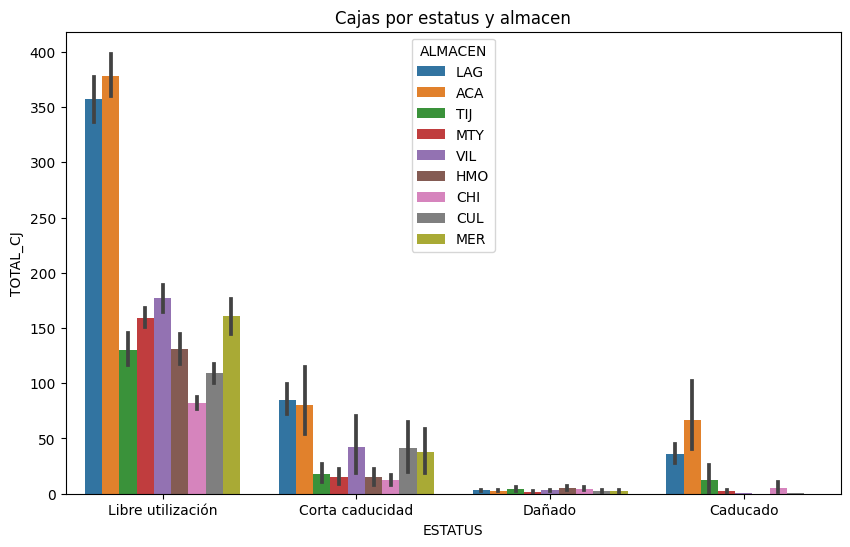

In [123]:
# ¿Como está distribuido el inventario según su estatus y almacén?
# Gráfico de barras 'Cajas por estatus y almacen'
plt.figure(figsize=(10, 6))
sns.barplot(data = df,
           x = 'ESTATUS',
           y = 'TOTAL_CJ',
           hue = 'ALMACEN')
plt.title('Cajas por estatus y almacen')
plt.show()

In [124]:
# ¿Cuál es la participación de cajas por categoría?
## Porcentaje de participación de cajas por categoria
total_cj_por_cat = df.groupby('CATEGORIA')['TOTAL_CJ'].sum()
part_cj_cat = total_cj_por_cat / total_cj_por_cat.sum()
df_cj_cat = pd.DataFrame({
    'Categoria': part_cj_cat.index,
    'Porcentaje_cj_cat': part_cj_cat.values})
df_cj_cat = df_cj_cat.sort_values(by='Porcentaje_cj_cat', ascending=False)
df_cj_cat

Categoria  Porcentaje_cj_cat
0                    Bif           0.592100
2              Chocolate           0.165373
1       Bif Exportación            0.084130
4   Chocolate Industrial           0.074709
3  Chocolate Exportación           0.052749
5                 Snacks           0.030939

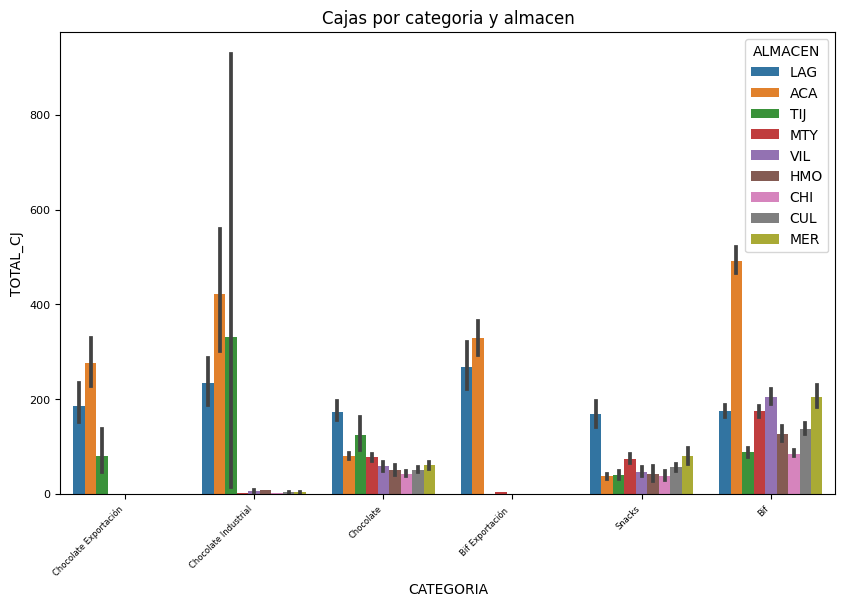

In [125]:
# ¿Como está distribuido el inventario según su categoria y almacén?
## Gráfico de barras 'Cajas por categoría y almacen'
plt.figure(figsize=(10, 6))
sns.barplot(data = df,
           x = 'CATEGORIA',
           y = 'TOTAL_CJ',
           hue = 'ALMACEN')
plt.title('Cajas por categoria y almacen')
plt.xticks(rotation=45, ha='right',fontsize=6)
plt.yticks(fontsize=8)
plt.show()

Con estos datos se observa que Bif tiene la mayor participación con un 59% seguido de chocolate con un 16%, siendo Snacks el que presenta la participación menor con 3%.

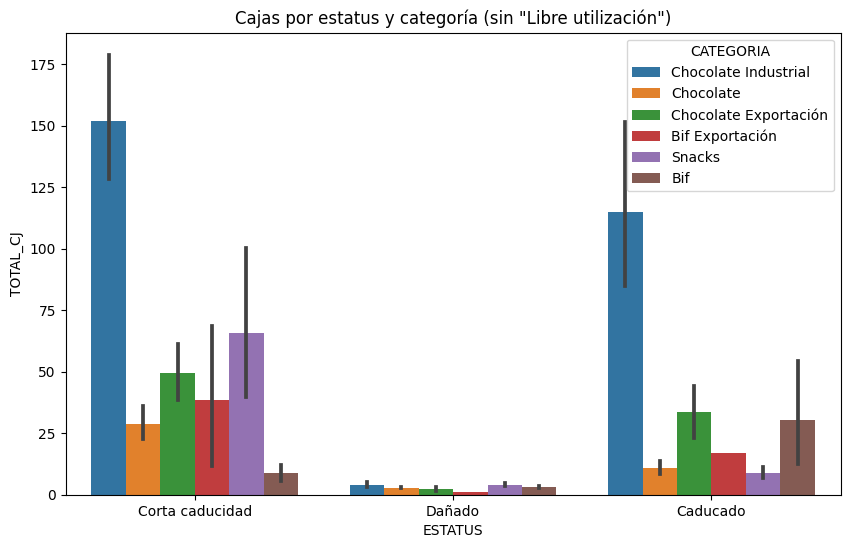

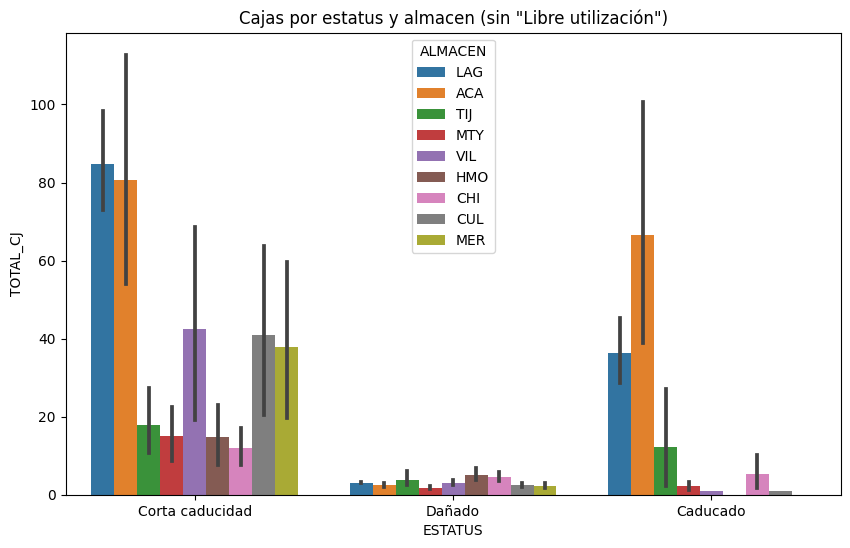

In [126]:
# ¿Como está distribuido el inventario según su estatus y categoría de riesgo?
## Gráfico de barras 'Cajas por estatus y categoría', filtrando 'Libre utilización'
estatus_a_excluir = 'Libre utilización'
df_filtrado = df_filtrado = df[df['ESTATUS'] != estatus_a_excluir]

plt.figure(figsize=(10, 6))
sns.barplot(data = df_filtrado,
           x = 'ESTATUS',
           y = 'TOTAL_CJ',
           hue = 'CATEGORIA')
plt.title('Cajas por estatus y categoría (sin "{}")'.format(estatus_a_excluir))
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data = df_filtrado,
           x = 'ESTATUS',
           y = 'TOTAL_CJ',
           hue = 'ALMACEN')
plt.title('Cajas por estatus y almacen (sin "{}")'.format(estatus_a_excluir))
plt.show()

Con esta visualización se identifica que el Chocolate Industrial es el que presenta la mayor participación dentro del stock en riesgo (corta caducidad y dañado) así mismo es el  producto que tiene la mayor merma en cajas por caducidad vencida.

Con esta visualización se obsera que los almacenes LAG y JAL, tiene la mayor participación en el inventario de producto el libre utilización, por otro lado HMO tiene la menor participación en libre, sin embargo es el almacen que tiene más producto dañado. La mayor cantidad de producto corta caducidad y caducado se encuentra en LAG.

Los almacenes JAL y LAG tienen la mayor participación en el inventario,lo cual es de esperarse pues son los más grandes, siendo Bif la categoria que más cajas incluye.

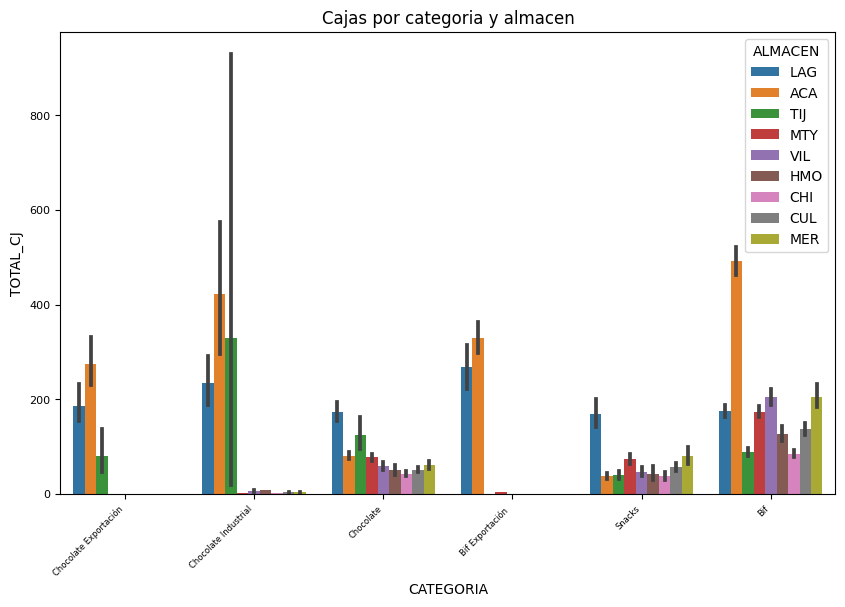

In [127]:
# ¿Como está distribuido el inventario según su categoria y almacén?
## Gráfico de barras 'Cajas por categoría y almacen'
plt.figure(figsize=(10, 6))
sns.barplot(data = df,
           x = 'CATEGORIA',
           y = 'TOTAL_CJ',
           hue = 'ALMACEN')
plt.title('Cajas por categoria y almacen')
plt.xticks(rotation=45, ha='right',fontsize=6)
plt.yticks(fontsize=8)
plt.show()

Se observa que la mayor cantidad de producto caducado se presenta en ACA.

Variable Target: TOTAL_CJ

La variable objetivo es de tipo numérica, por lo que el modelo a desarrollar será de tipo Aprendizaje Supervisado: Regresión.

A continuación se presentarán algunas estadísticas para entender el comportamiento, formato y distribución de esta variable.

In [128]:
# Calcular algunas estadísticas
variable_target = df['TOTAL_CJ']
variable_target.describe().round(0)

count    34336.0
mean       175.0
std        478.0
min          1.0
25%          3.0
50%         35.0
75%        157.0
max      21002.0
Name: TOTAL_CJ, dtype: float64

Text(0.5, 1.0, 'Distribución de TOTAL_CJ')

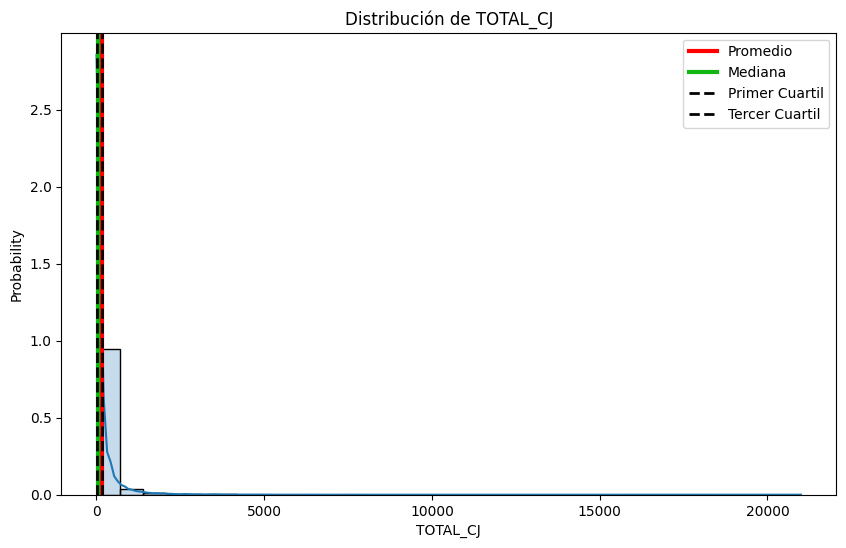

In [129]:
# Histograma variable target
# Calcular algunas medidas de interés
media = variable_target.mean()
mediana = variable_target.median()
primer_cuartil = variable_target.quantile(0.25)
tercer_cuartil = variable_target.quantile(0.75)

# Graficamente
plt.figure(figsize=(10, 6))
sns.histplot(data = df,
             x = 'TOTAL_CJ',
             bins = 30,
             alpha = 0.25,
             kde = True,
             stat='probability')
# Agregar línea de promedio
plt.axvline(x = media,
            color = 'red',
            linestyle = '-',
            label = 'Promedio',
            linewidth = 3)
# Agregar línea de mediana
plt.axvline(x = mediana,
            color = '#11B613',
            linestyle = '-',
            label = 'Mediana',
            linewidth = 3)
# Agregar línea de primer cuartil
plt.axvline(x = primer_cuartil,
            color = 'black',
            linestyle = '--',
            label = 'Primer Cuartil',
            linewidth = 2)
# Agregar línea de tercer cuartil
plt.axvline(x = tercer_cuartil,
            color = 'black',
            linestyle = '--',
            label = 'Tercer Cuartil',
            linewidth = 2)
plt.legend()
plt.title('Distribución de TOTAL_CJ')

Text(0.5, 1.0, 'Distibución de TOTAL_CJ por MATERIAL y ESTATUS')

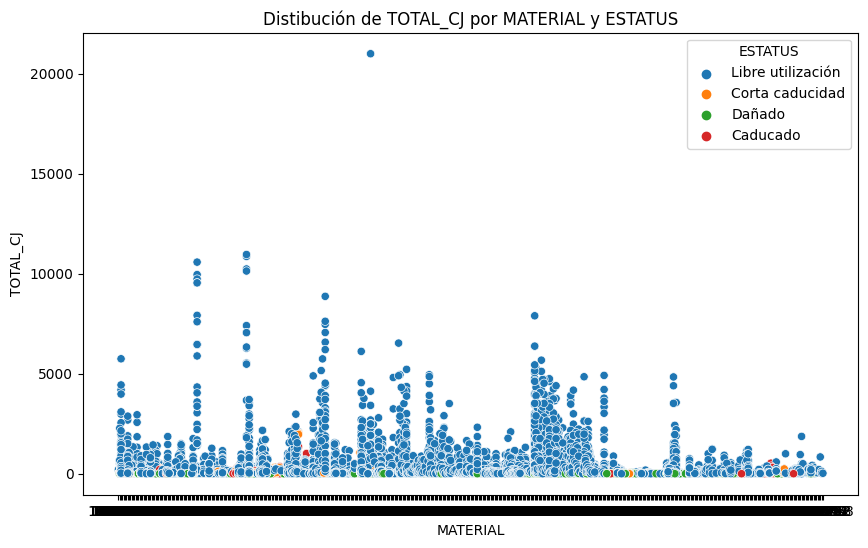

In [130]:
# Ver distribución graficamente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
                x = 'MATERIAL',
                y = 'TOTAL_CJ',
              hue = 'ESTATUS')
plt.title('Distibución de TOTAL_CJ por MATERIAL y ESTATUS')

Análisis Variable Target: TOTAL_CJ

Se puede observar que la variable tiene una distribución asimétrica positiva (la mediana es menor que el promedio), concentrando la mayoria de los registros (50%) en valores bajos (menores a 35) y observando muy pocos registros en valores altos.

Esto indicaría que hay muy pocos productos con inventarios altos, por lo tanto sería conveniente no considerar los valores altos para los futuras predicciones.

Por lo anterior procederé con la detección y remoción de outliers en espera de mejorar la distibución.

In [224]:
# Detección de outliers: Método IQR
variable_target = df['TOTAL_CJ']
media = variable_target.mean()
mediana = variable_target.median()
primer_cuartil = variable_target.quantile(0.25)
tercer_cuartil = variable_target.quantile(0.75)
rango_intercuartilico = tercer_cuartil - primer_cuartil
# Límites:
limite_inf = primer_cuartil - (1 * rango_intercuartilico)
limite_sup = tercer_cuartil + (1 * rango_intercuartilico)
print(limite_inf,limite_sup)

-151.25 311.5


In [132]:
# Identificar outliers
df['Otlier_IQR'] = np.where((df['TOTAL_CJ'] < limite_inf) | (df['TOTAL_CJ'] > limite_sup),1,0)
df['Otlier_IQR'].value_counts()

0    30341
1     3995
Name: Otlier_IQR, dtype: int64

Text(0.5, 1.0, 'Detección de Outliers - Método IQR')

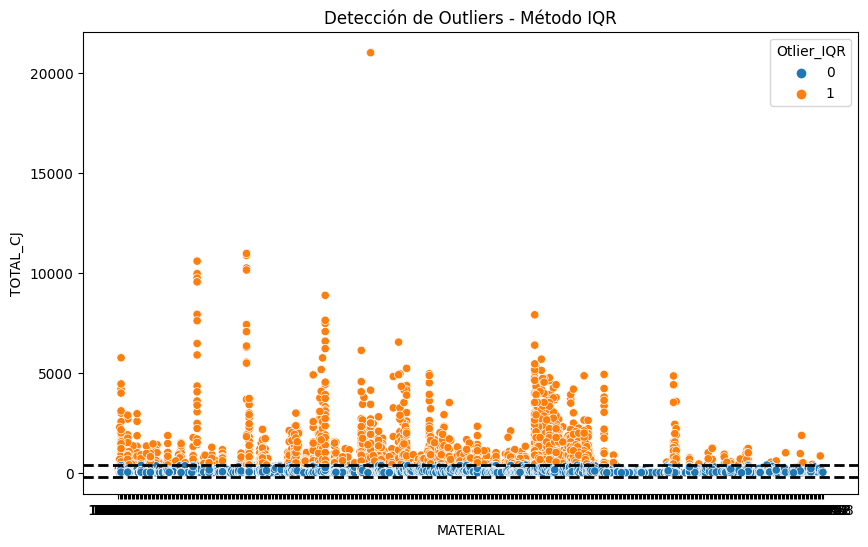

In [133]:
#Graficamente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
                x = 'MATERIAL',
                y = 'TOTAL_CJ',
               hue = 'Otlier_IQR')
plt.axhline(y = limite_inf,
            color = 'black',
            linestyle = '--',
            label = 'Limite Inferior',
            linewidth = 2)
plt.axhline(y = limite_sup,
            color = 'black',
            linestyle = '--',
            label = 'Limite Superior',
            linewidth = 2)
plt.title('Detección de Outliers - Método IQR')

In [134]:
#Remoción de outliers, tomando como base el resultado del método IQR
df['TOTAL_CJ_Topeada'] = (df['TOTAL_CJ'].clip(-151.25, 311.5))

Text(0.5, 1.0, 'Remoción de Outliers - Método IQR')

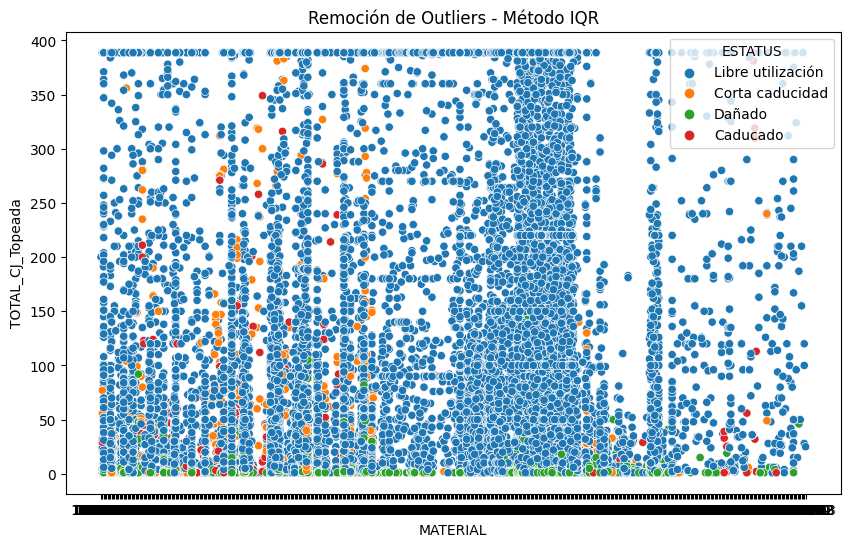

In [135]:
#Graficamente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
                x = 'MATERIAL',
                y = 'TOTAL_CJ_Topeada',
               hue = 'ESTATUS')
plt.title('Remoción de Outliers - Método IQR')

Text(0.5, 1.0, 'Distribución de TOTAL_CJ_Topeada')

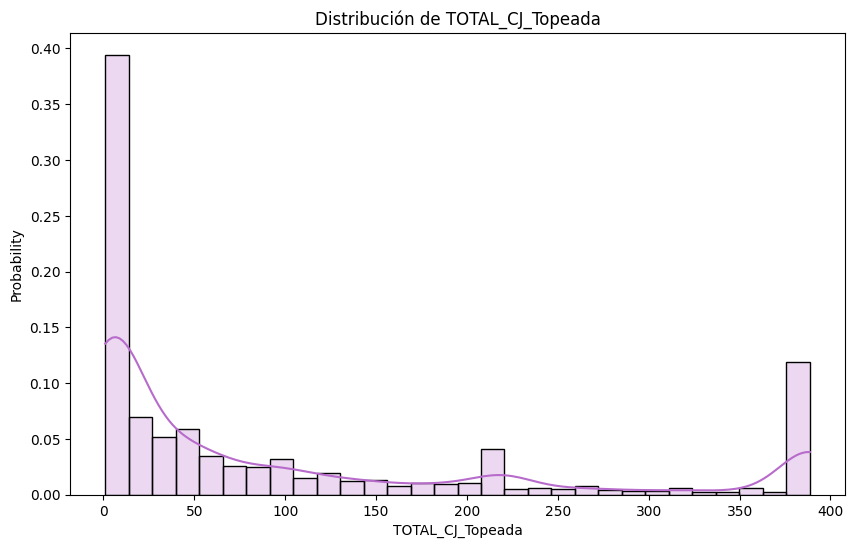

In [136]:
#Graficar nueva distribución del target topeado
plt.figure(figsize=(10, 6))
# Histograma
sns.histplot(data = df,
             x = 'TOTAL_CJ_Topeada',
             bins = 30,
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#B76BCB')
plt.title('Distribución de TOTAL_CJ_Topeada')

Intentaré mejorar la distribución con el logaritmo del target.

In [137]:
# Generar variable logarítmica
df['TOTAL_CJ_Topeada_Log'] = np.log(df['TOTAL_CJ_Topeada'])

Text(0.5, 1.0, 'Distribución de TOTAL_CJ_Topeada transformada a Logaritmo vs Categoria')

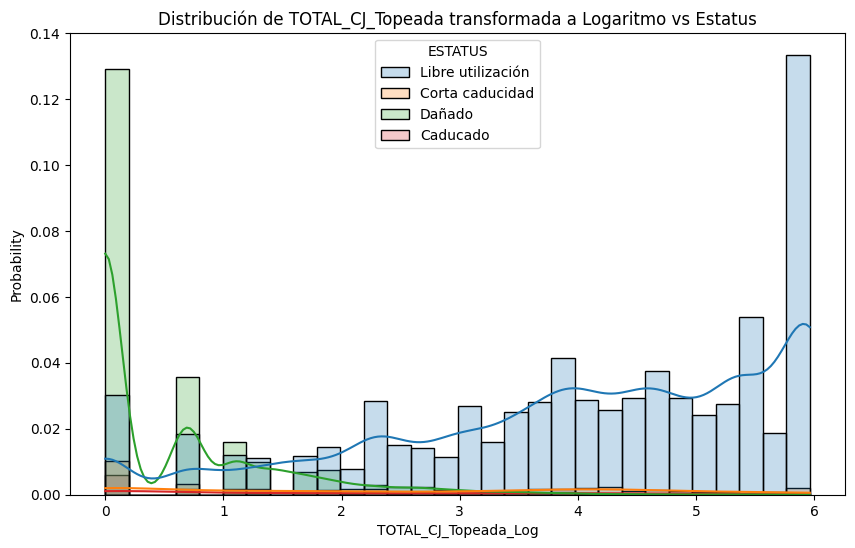

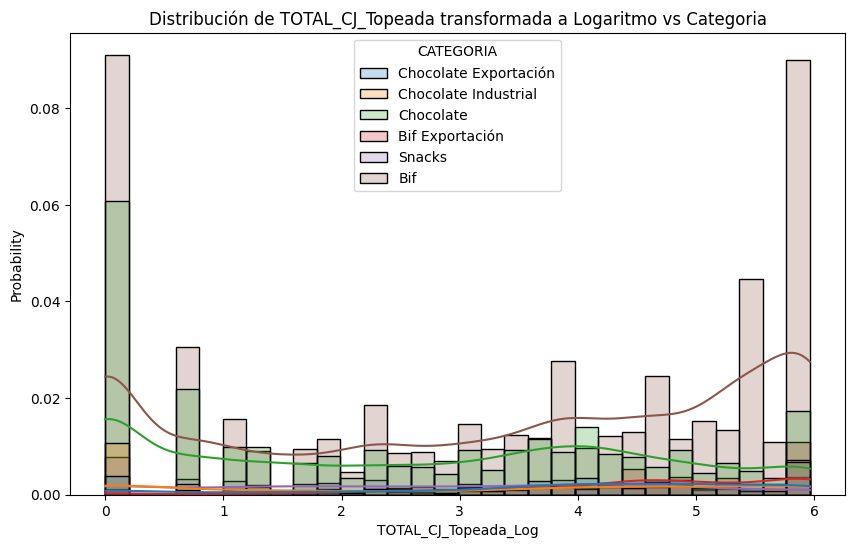

In [138]:
# Gráficamente
plt.figure(figsize=(10, 6))
# Histograma
sns.histplot(data = df,
             x = 'TOTAL_CJ_Topeada_Log',
             bins = 30,
             alpha = 0.25,
             kde = True,
             hue = 'ESTATUS',
             stat='probability')
plt.title('Distribución de TOTAL_CJ_Topeada transformada a Logaritmo vs Estatus')

# Gráficamente
plt.figure(figsize=(10, 6))
# Histograma
sns.histplot(data = df,
             x = 'TOTAL_CJ_Topeada_Log',
             bins = 30,
             alpha = 0.25,
             kde = True,
             hue = 'CATEGORIA',
             stat='probability')
plt.title('Distribución de TOTAL_CJ_Topeada transformada a Logaritmo vs Categoria')


Se aprecia una distribución un poco más normalizada, con 2 picos interesantes en cantidades bajas y medias.

Ahora continuaré el análisis con la variable tarjet topeada logarítmica.


Reducción de dimensionalidad - Correlación de las variables con el target.

Lo próximo que analizaremos es la correlación entre cada variable disponible y la variable target. Válido únicamente para las variables numéricas, haremos este análisis para detectar cuáles son las variables numéricas más relacionadas con la variable target, para detenernos en el análisis de algunas de ellas.

In [139]:
# Calculo  de matriz de correlación
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])
# Calcular la matriz de correlación en las columnas numéricas
matriz_correlacion = df_numeric.corr(method='pearson')
# Seleccionar la correlación con la variable target
matriz_correlacion_target = matriz_correlacion['TOTAL_CJ_Topeada_Log']
# Calcular valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido
matriz_correlacion_target = abs(matriz_correlacion_target)
# Mencionar columnas a excluir del análisis de correlación
columnas_a_excluir = ['TOTAL_CJ','TOTAL_CJ_Topeada','TOTAL_CJ_Topeada_Log','Otlier_IQR']
# Excluir del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordenar de mayor a menor correlación
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

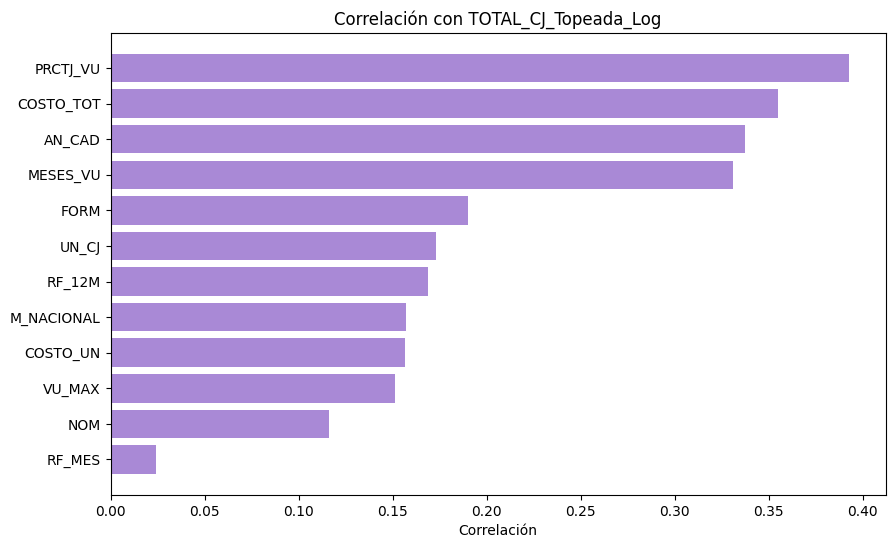

In [140]:
# Graficar variables numéricas más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:30]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index,
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con TOTAL_CJ_Topeada_Log')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

Las 3 variables más correlacionadas con el target son el PRCTJ_VU, COSTO_TOT, AN_CAD

PRCTJ_VU Esta variable es númerica y relación con la caducidad del producto. Es cuantitativa.

Text(0.5, 1.0, 'Distribución de PRCTJ_VU')

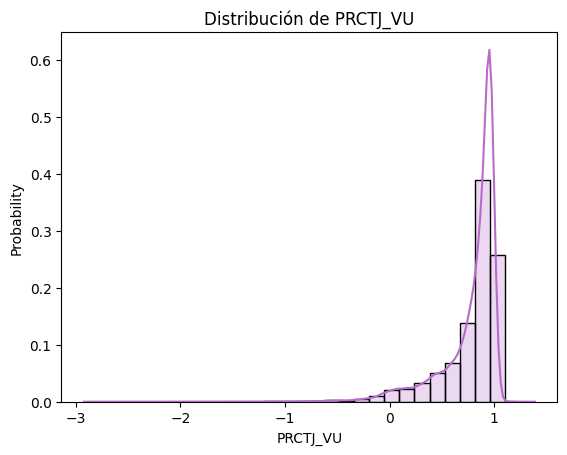

In [271]:
# Histograma
sns.histplot(data = df,
             x = 'PRCTJ_VU',
             bins = 30,
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#B76BCB')
plt.title('Distribución de PRCTJ_VU')

Text(0.5, 1.0, 'Relación entre PRCTJ_VU y TOTAL_CJ_Topeada_LOG vs Categoria')

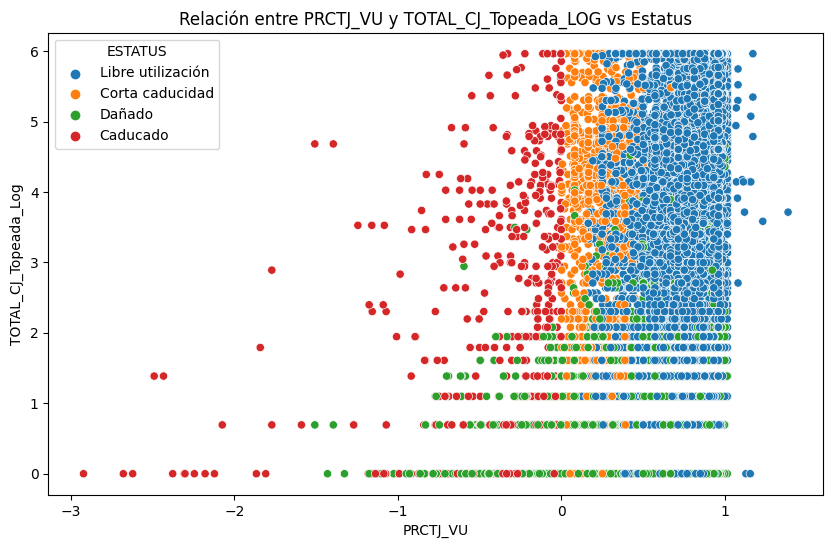

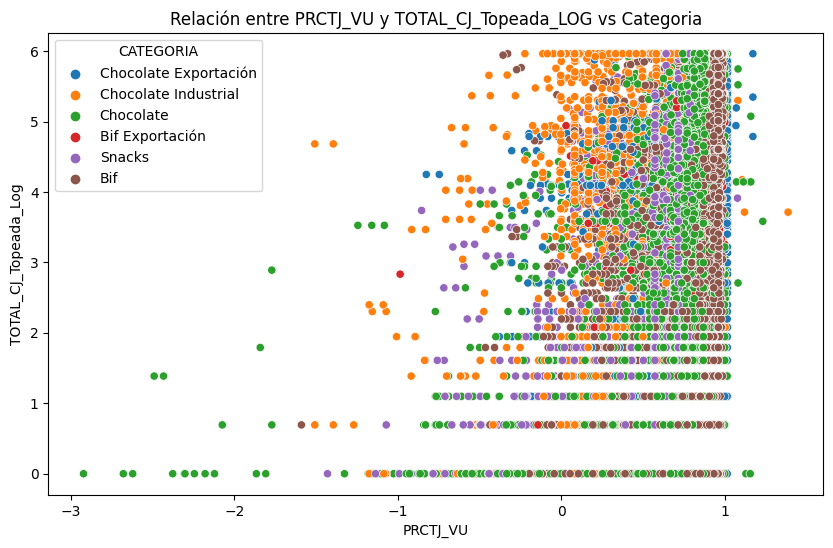

In [230]:
# Visualmente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
            x = 'PRCTJ_VU',
            y = 'TOTAL_CJ_Topeada_Log',
            hue = 'ESTATUS')
plt.title('Relación entre PRCTJ_VU y TOTAL_CJ_Topeada_LOG vs Estatus')

# Visualmente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
            x = 'PRCTJ_VU',
            y = 'TOTAL_CJ_Topeada_Log',
            hue = 'CATEGORIA')
plt.title('Relación entre PRCTJ_VU y TOTAL_CJ_Topeada_LOG vs Categoria')

Se observan algunos outliers para esta variable, procedere a topearla

In [251]:
# Detección de outliers: Método IQR
variable_PRCTJ_VU = df['PRCTJ_VU']
media = variable_PRCTJ_VU.mean()
mediana = variable_PRCTJ_VU.median()
primer_cuartil = variable_PRCTJ_VU.quantile(0.25)
tercer_cuartil = variable_PRCTJ_VU.quantile(0.75)
rango_intercuartilico = tercer_cuartil - primer_cuartil
# Límites:
limite_inf = primer_cuartil - (3 * rango_intercuartilico)
limite_sup = tercer_cuartil + (0.2 * rango_intercuartilico)
print(limite_inf,limite_sup)

-0.01182591041745995 1.0070777820073595


In [248]:
# Identificar outliers
df['Otlier_IQR'] = np.where((df['PRCTJ_VU'] < limite_inf) | (df['PRCTJ_VU'] > limite_sup),1,0)
df['Otlier_IQR'].value_counts()

0    33124
1     1212
Name: Otlier_IQR, dtype: int64

Text(0.5, 1.0, 'Detección de Outliers - Método IQR')

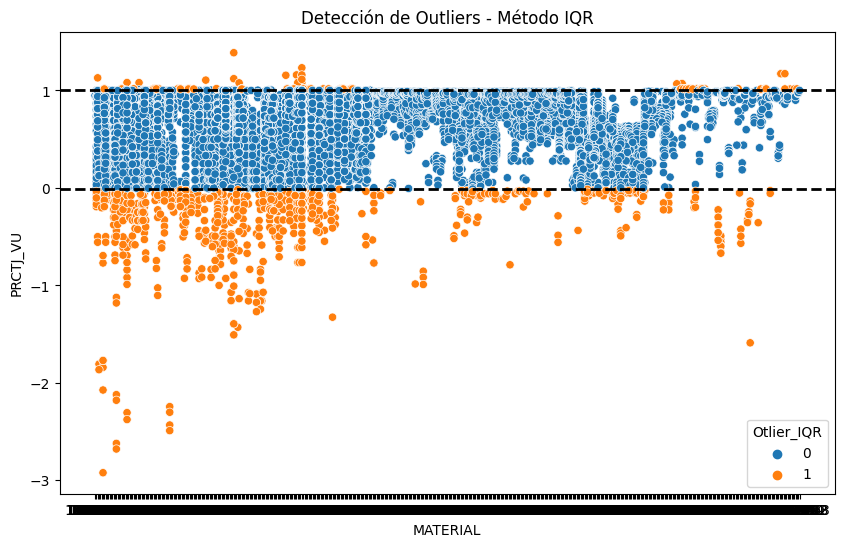

In [249]:
#Graficamente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
                x = 'MATERIAL',
                y = 'PRCTJ_VU',
               hue = 'Otlier_IQR')
plt.axhline(y = limite_inf,
            color = 'black',
            linestyle = '--',
            label = 'Limite Inferior',
            linewidth = 2)
plt.axhline(y = limite_sup,
            color = 'black',
            linestyle = '--',
            label = 'Limite Superior',
            linewidth = 2)
plt.title('Detección de Outliers - Método IQR')

In [253]:
#Remoción de outliers, tomando como base el resultado del método IQR
df['PRCTJ_VU_Topeada'] = (df['PRCTJ_VU'].clip(-0.01182591041745995, 1.0070777820073595))

Text(0.5, 1.0, 'Remoción de Outliers - Método IQR')

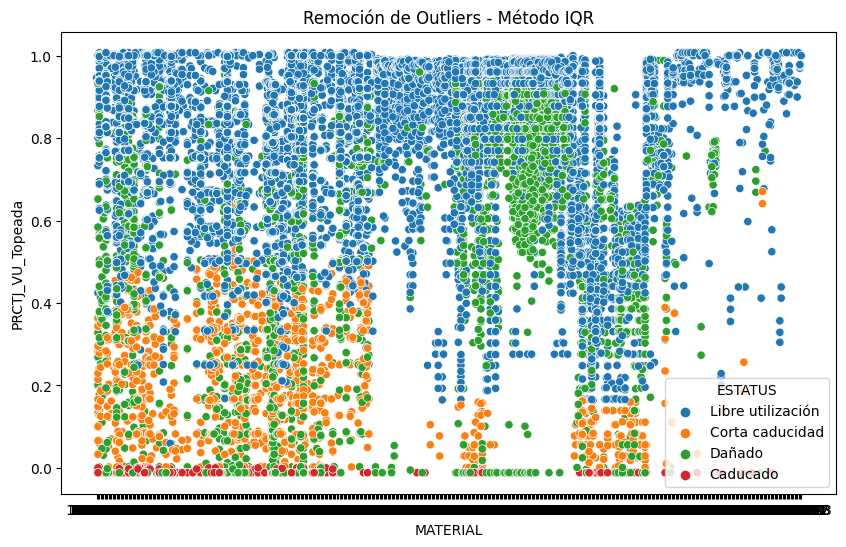

In [254]:
#Graficamente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
                x = 'MATERIAL',
                y = 'PRCTJ_VU_Topeada',
               hue = 'ESTATUS')
plt.title('Remoción de Outliers - Método IQR')

Text(0.5, 1.0, 'Distribución de PRCTJ_VU_Topeada')

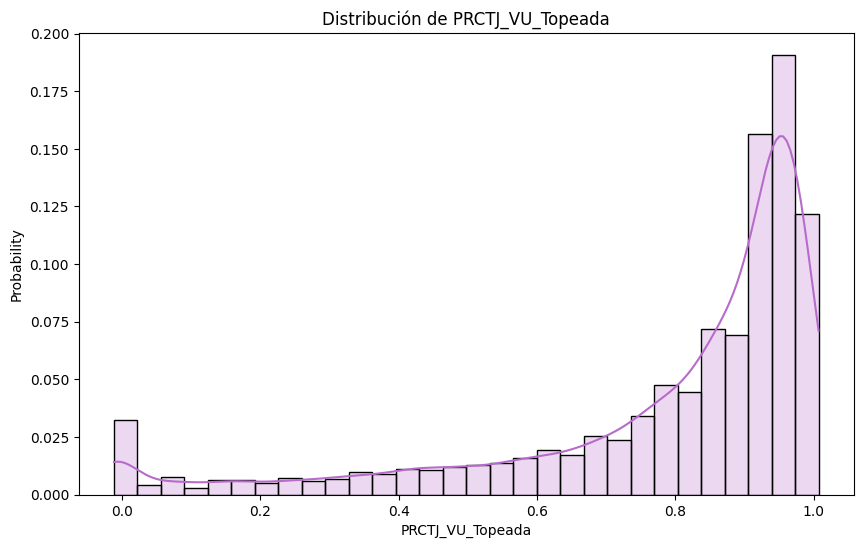

In [256]:
#Graficar nueva distribución del PRCTJ_VU topeado
plt.figure(figsize=(10, 6))

# Histograma
sns.histplot(data = df,
             x = 'PRCTJ_VU_Topeada',
             bins = 30,
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#B76BCB')
plt.title('Distribución de PRCTJ_VU_Topeada')

In [257]:
# Primero genero la variable logaritmica
df['PRCTJ_VU_Topeada_Log'] = np.log(df['PRCTJ_VU_Topeada'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Relación entre los Logaritmos del PRCTJ_VU_Topeada y TOTAL_CJ_Topeada vs Categoria')

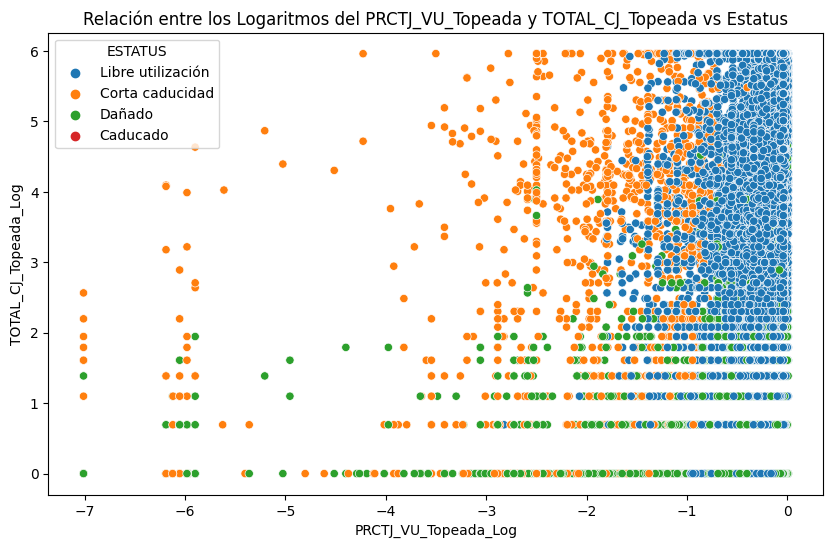

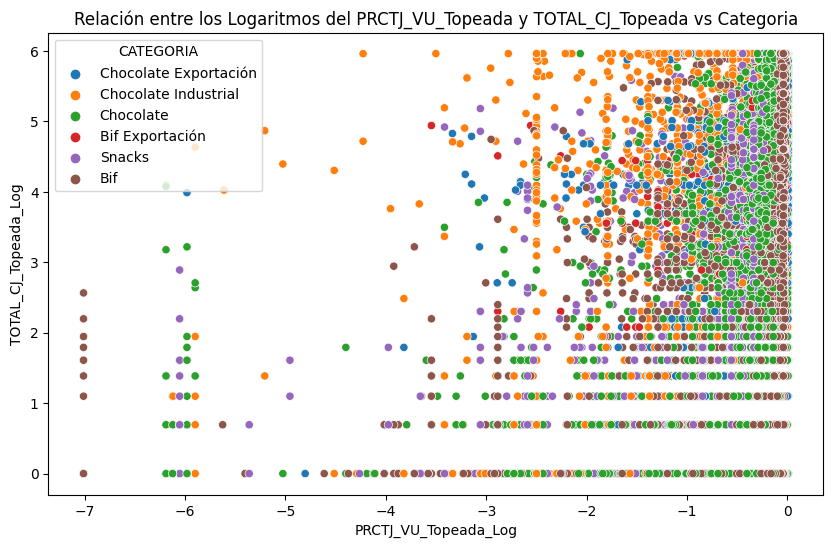

In [259]:
# Visualmente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
            x = 'PRCTJ_VU_Topeada_Log',
            y = 'TOTAL_CJ_Topeada_Log',
            hue = 'ESTATUS')
plt.title('Relación entre los Logaritmos del PRCTJ_VU_Topeada y TOTAL_CJ_Topeada vs Estatus')

# Visualmente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
            x = 'PRCTJ_VU_Topeada_Log',
            y = 'TOTAL_CJ_Topeada_Log',
            hue = 'CATEGORIA')
plt.title('Relación entre los Logaritmos del PRCTJ_VU_Topeada y TOTAL_CJ_Topeada vs Categoria')

In [260]:
coeficiente = df[['PRCTJ_VU_Topeada_Log','TOTAL_CJ_Topeada_Log']].corr(method='pearson')
coeficiente

PRCTJ_VU_Topeada_Log  TOTAL_CJ_Topeada_Log
PRCTJ_VU_Topeada_Log              1.000000              0.291572
TOTAL_CJ_Topeada_Log              0.291572              1.000000

Conclusión: Se aprecia una baja correlación con el target

COSTO_TOT

Esta variable es númerica, depende la cantidad de cajas existentes del material. Es cuantitativa.

In [144]:
# Generar la variable logarítmica
df['COSTO_TOT_Log'] = np.log(df['COSTO_TOT'])

Text(0.5, 1.0, 'Relación entre los Logaritmos del COSTO_TOT y TOTAL_CJ Topeada vs Categoria')

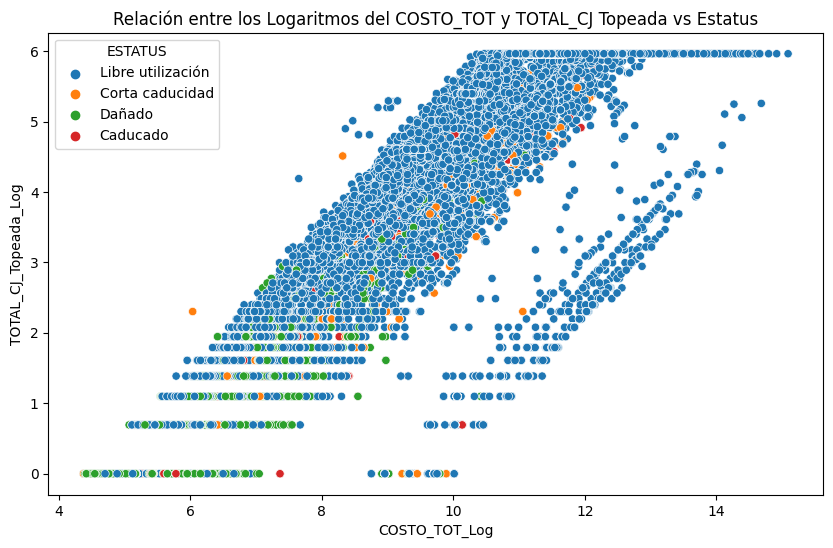

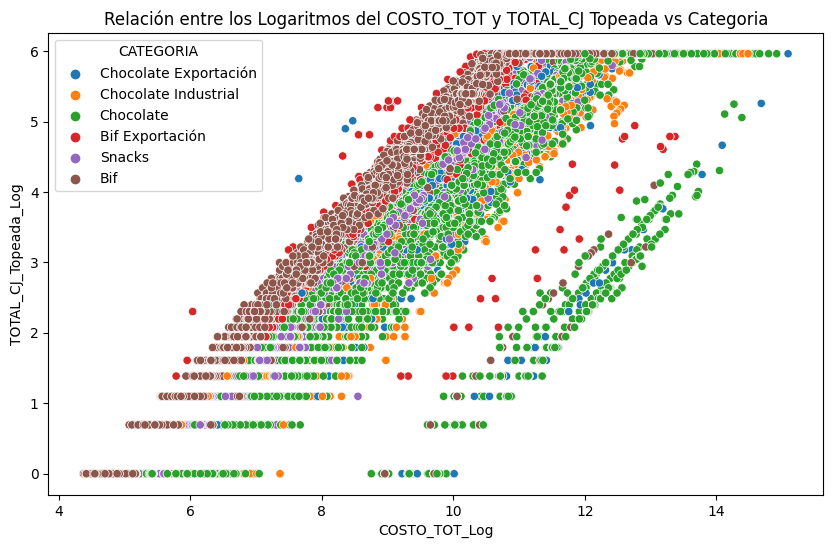

In [145]:
# Graficamente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
            x = 'COSTO_TOT_Log',
            y = 'TOTAL_CJ_Topeada_Log',
            hue = 'ESTATUS')
plt.title('Relación entre los Logaritmos del COSTO_TOT y TOTAL_CJ Topeada vs Estatus')
# Graficamente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
            x = 'COSTO_TOT_Log',
            y = 'TOTAL_CJ_Topeada_Log',
            hue = 'CATEGORIA')
plt.title('Relación entre los Logaritmos del COSTO_TOT y TOTAL_CJ Topeada vs Categoria')

In [146]:
coeficiente = df[['COSTO_TOT_Log','TOTAL_CJ_Topeada_Log']].corr(method='pearson')
coeficiente

COSTO_TOT_Log  TOTAL_CJ_Topeada_Log
COSTO_TOT_Log              1.000000              0.902677
TOTAL_CJ_Topeada_Log       0.902677              1.000000

Conclusión: Se puede apreciar que a medida que aumenta la cantidad de cajas, aumenta el costo total. Se comprueba correlación que existe y esta es muy fuerte (0.90). A mayor cantidad cajas, mayor costo.

AN_CAD

Esta variable es númerica y depende de la fecha de caducidad del producto. Es cuantitativa.

In [147]:
# Primero genero la variable logaritmica
df['AN_CAD_Log'] = np.log(df['AN_CAD'])

Text(0.5, 1.0, 'Relación entre los Logaritmos del AN_CAD y TOTAL_CJ Topeada vs Categoria')

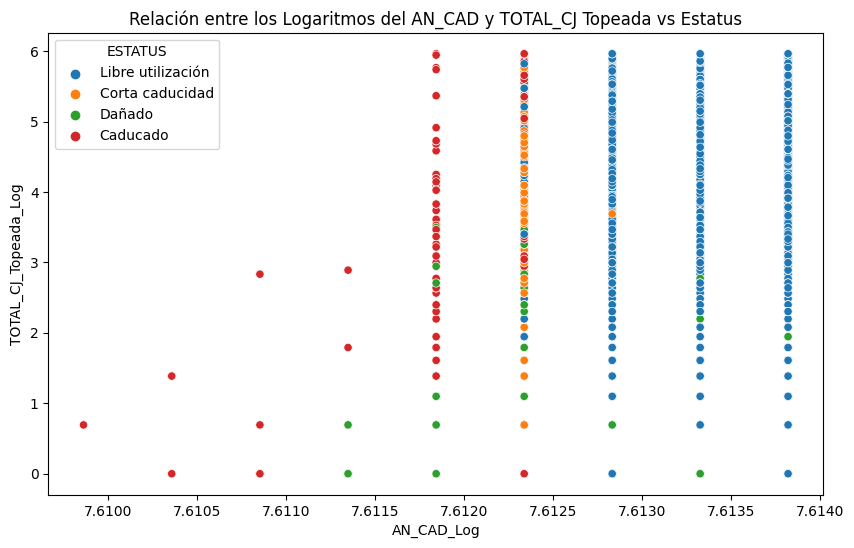

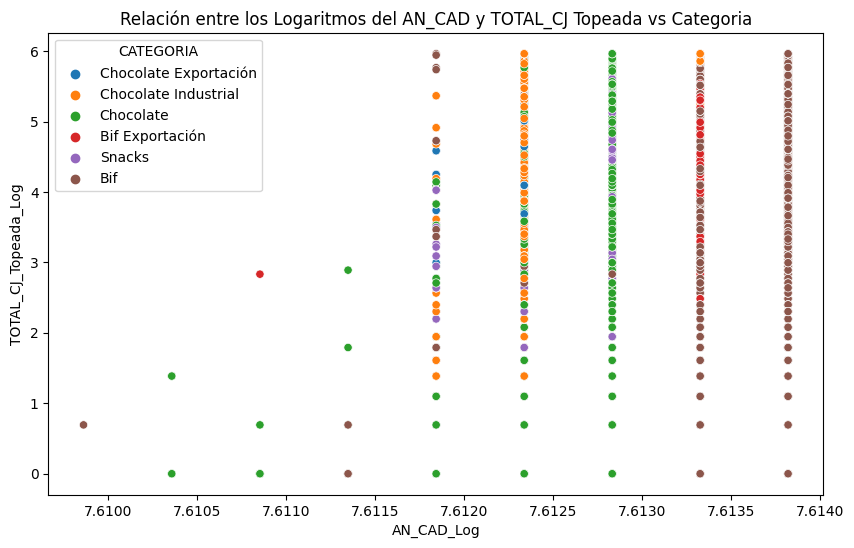

In [148]:
# Visualmente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
            x = 'AN_CAD_Log',
            y = 'TOTAL_CJ_Topeada_Log',
            hue = 'ESTATUS')
plt.title('Relación entre los Logaritmos del AN_CAD y TOTAL_CJ Topeada vs Estatus')

# Visualmente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
            x = 'AN_CAD_Log',
            y = 'TOTAL_CJ_Topeada_Log',
            hue = 'CATEGORIA')
plt.title('Relación entre los Logaritmos del AN_CAD y TOTAL_CJ Topeada vs Categoria')

In [149]:
coeficiente = df[['AN_CAD_Log','TOTAL_CJ_Topeada_Log']].corr(method='pearson')
coeficiente

AN_CAD_Log  TOTAL_CJ_Topeada_Log
AN_CAD_Log              1.000000              0.337565
TOTAL_CJ_Topeada_Log    0.337565              1.000000

Conclusión: Se puede apreciar que a medida que el año de caducidad aumenta tambien la cantidad de cajas aumenta. Se comprueba correlación existente, aunque es baja.

MESES_VU

Esta variable es numerica y depende del tipo de producto y los meses transcurridos desde su producción. Es cuantitativa.

(array([-80., -60., -40., -20.,   0.,  20.,  40.,  60.]),
 [Text(-80.0, 0, '−80'),
  Text(-60.0, 0, '−60'),
  Text(-40.0, 0, '−40'),
  Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60')])

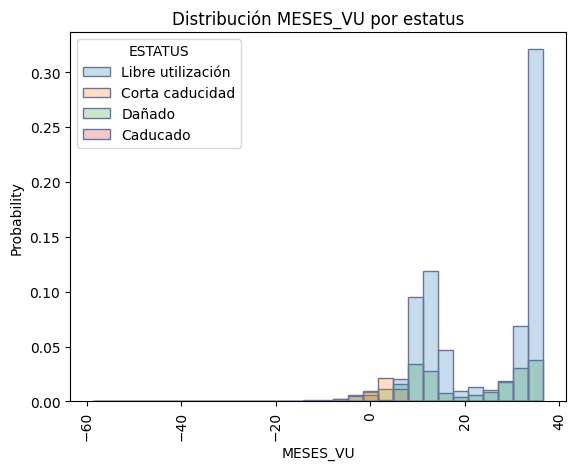

In [283]:
plt.figure()
sns.histplot(data = df,
             x = 'MESES_VU',
             alpha = 0.25,
             edgecolor = '#6B7498',
             stat = 'probability',
             bins = 30,
             hue = 'ESTATUS')
plt.title('Distribución MESES_VU por estatus')
plt.xticks(rotation=90)

In [150]:
# Primero genero la variable logaritmica
df['MESES_VU_Log'] = np.log(df['MESES_VU'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Relación entre los Logaritmos del MESES_VU y TOTAL_CJ_Topeada vs Categoria')

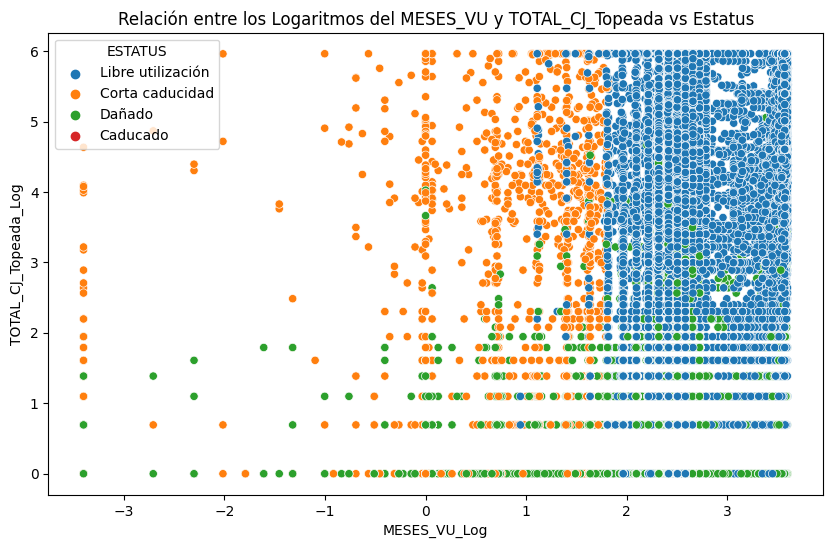

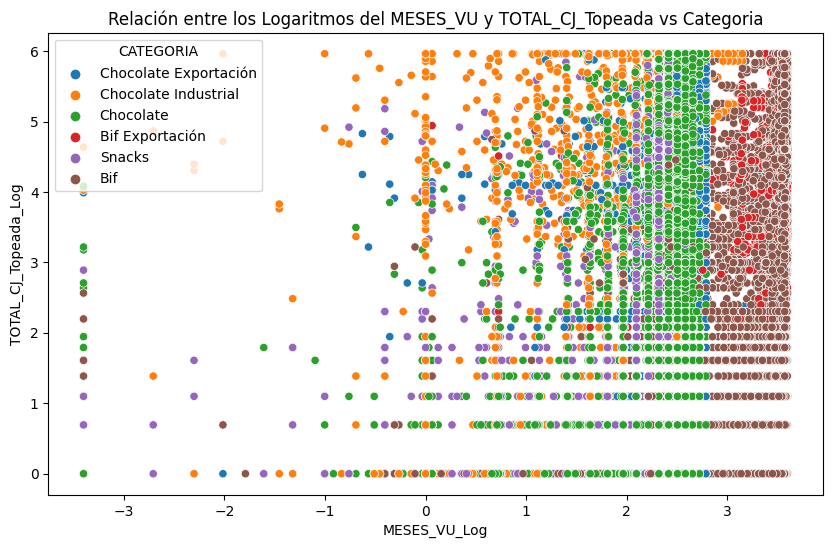

In [151]:
# Visualmente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
            x = 'MESES_VU_Log',
            y = 'TOTAL_CJ_Topeada_Log',
            hue = 'ESTATUS')
plt.title('Relación entre los Logaritmos del MESES_VU y TOTAL_CJ_Topeada vs Estatus')

# Visualmente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
            x = 'MESES_VU_Log',
            y = 'TOTAL_CJ_Topeada_Log',
            hue = 'CATEGORIA')
plt.title('Relación entre los Logaritmos del MESES_VU y TOTAL_CJ_Topeada vs Categoria')

In [152]:
coeficiente = df[['MESES_VU_Log','TOTAL_CJ_Topeada_Log']].corr(method='pearson')
coeficiente

MESES_VU_Log  TOTAL_CJ_Topeada_Log
MESES_VU_Log              1.000000              0.276148
TOTAL_CJ_Topeada_Log      0.276148              1.000000

Conclusión: Se observa que a mayor meses de vida útil disponible hay un mayor cantidad de cajas. Se comprueba correlación existente, aunque es baja.

UN_CJ

Esta variable es numerica y depende del tipo de producto. Es cuantitativa.

In [153]:
# Primero genero la variable logaritmica
df['UN_CJ_Log'] = np.log(df['UN_CJ'])

Text(0.5, 1.0, 'Relación entre los Logaritmos del UN_CJ y TOTAL_CJ_Topeada vs Categoria')

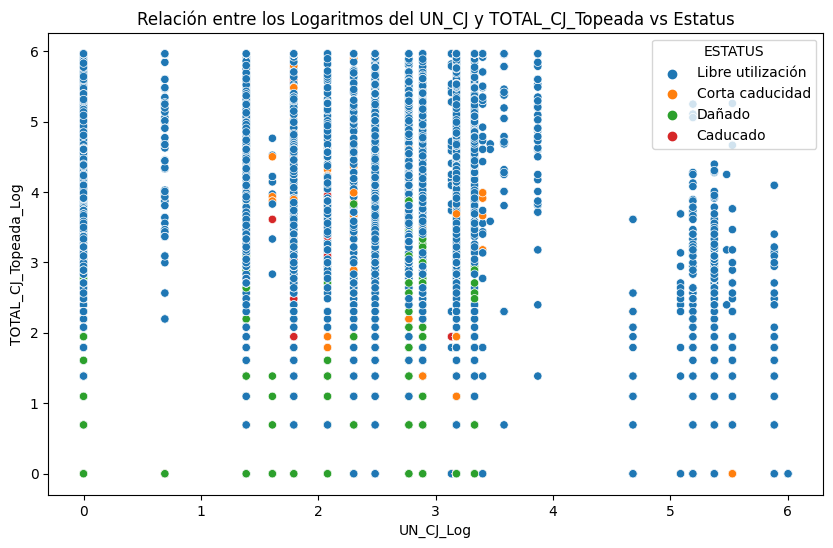

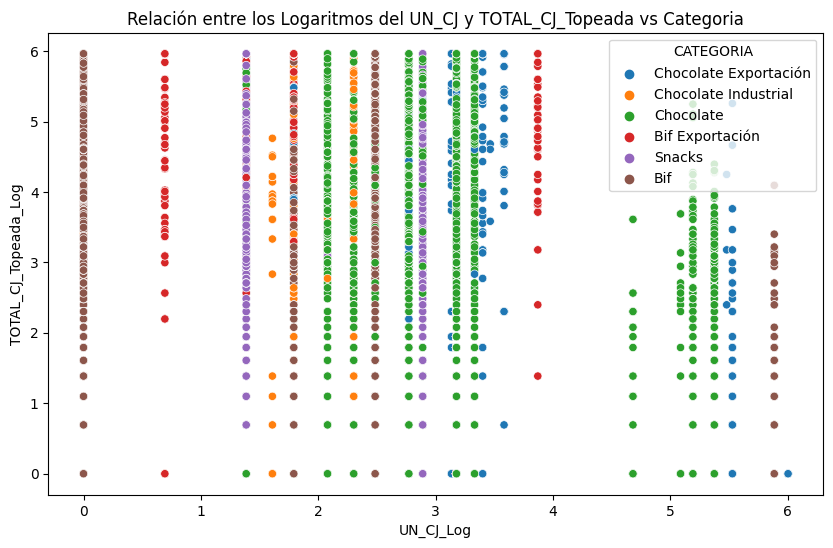

In [154]:
# Visualmente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
            x = 'UN_CJ_Log',
            y = 'TOTAL_CJ_Topeada_Log',
            hue = 'ESTATUS')
plt.title('Relación entre los Logaritmos del UN_CJ y TOTAL_CJ_Topeada vs Estatus')

# Visualmente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
            x = 'UN_CJ_Log',
            y = 'TOTAL_CJ_Topeada_Log',
            hue = 'CATEGORIA')
plt.title('Relación entre los Logaritmos del UN_CJ y TOTAL_CJ_Topeada vs Categoria')

In [155]:
coeficiente = df[['UN_CJ_Log','TOTAL_CJ_Topeada_Log']].corr(method='pearson')
coeficiente

UN_CJ_Log  TOTAL_CJ_Topeada_Log
UN_CJ_Log              1.000000             -0.155165
TOTAL_CJ_Topeada_Log  -0.155165              1.000000

Conclusión: No se aprecia relación entre UN_CJ_Log y TOTAL_CJ_Topeada.

COSTO_UN

Esta variable es numerica y depende del tipo de producto. Es cuantitativa.

In [156]:
# Primero genero la variable logaritmica
df['COSTO_UN_Log'] = np.log(df['COSTO_UN'])

Text(0.5, 1.0, 'Relación entre los Logaritmos del COSTO_UN y TOTAL_CJ_Topeada vs Categoria')

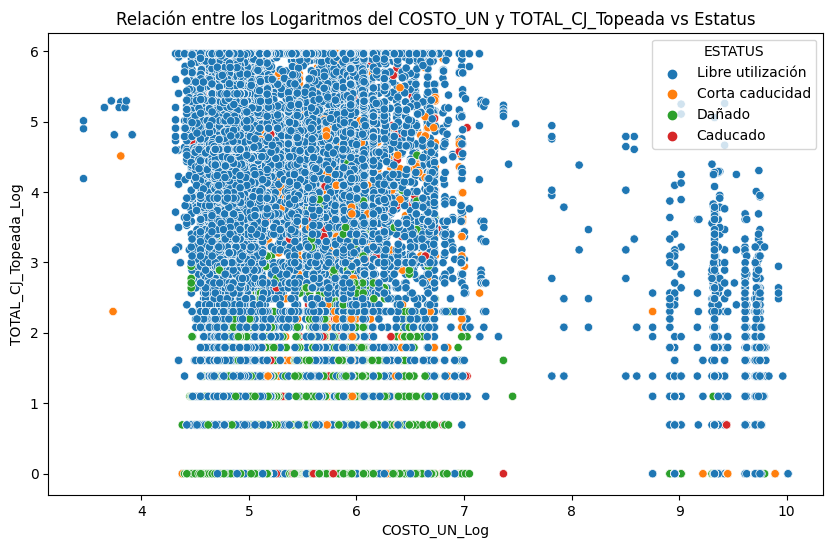

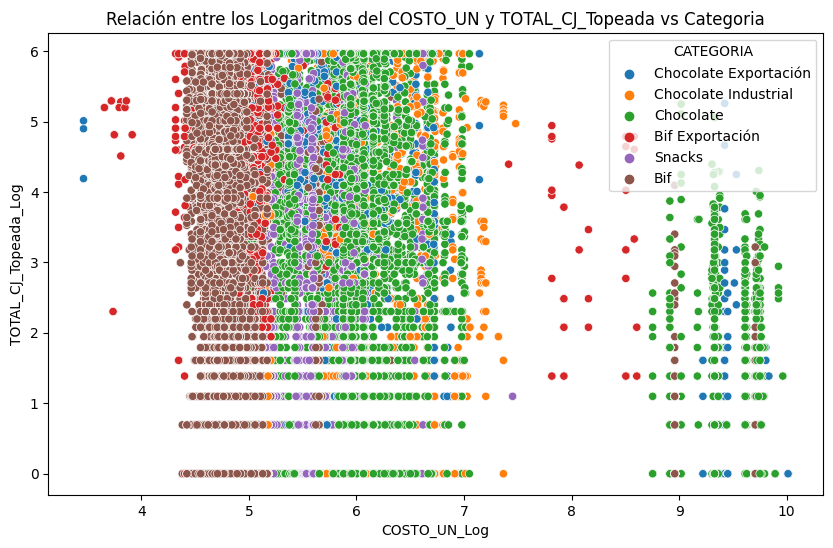

In [157]:
# Visualmente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
            x = 'COSTO_UN_Log',
            y = 'TOTAL_CJ_Topeada_Log',
          hue = 'ESTATUS')
plt.title('Relación entre los Logaritmos del COSTO_UN y TOTAL_CJ_Topeada vs Estatus')

# Visualmente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
            x = 'COSTO_UN_Log',
            y = 'TOTAL_CJ_Topeada_Log',
          hue = 'CATEGORIA')
plt.title('Relación entre los Logaritmos del COSTO_UN y TOTAL_CJ_Topeada vs Categoria')

In [158]:
coeficiente = df[['COSTO_UN_Log','TOTAL_CJ_Topeada_Log']].corr(method='pearson')
coeficiente

COSTO_UN_Log  TOTAL_CJ_Topeada_Log
COSTO_UN_Log              1.000000             -0.193283
TOTAL_CJ_Topeada_Log     -0.193283              1.000000

Conclusión: No se aprecia relación entre COSTO_UN y TOTAL_CJ_Topeada.

VU_MAX

Esta variable es númerica y depende del tipo de producto. Es cuantitativa.

In [159]:
# Primero genero la variable logaritmica
df['VU_MAX_Log'] = np.log(df['VU_MAX'])

Text(0.5, 1.0, 'Relación entre los Logaritmos del VU_MAX y TOTAL_CJ_Topeada vs Categoria')

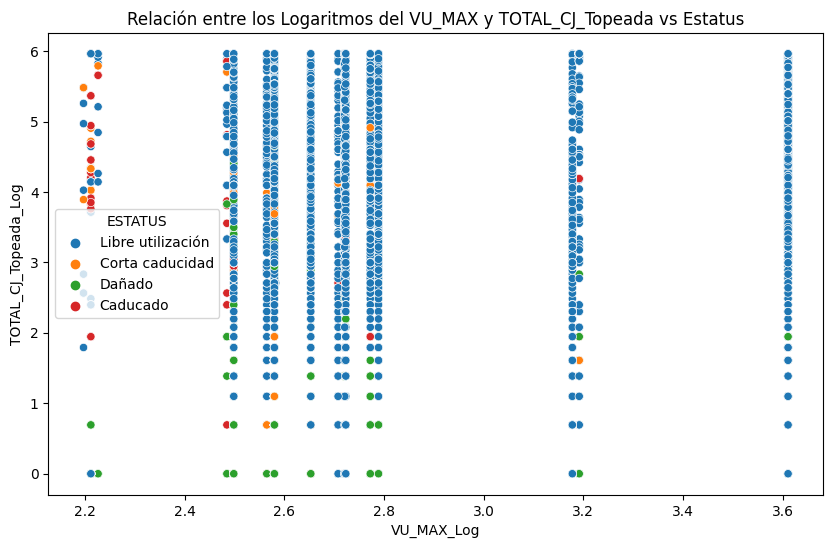

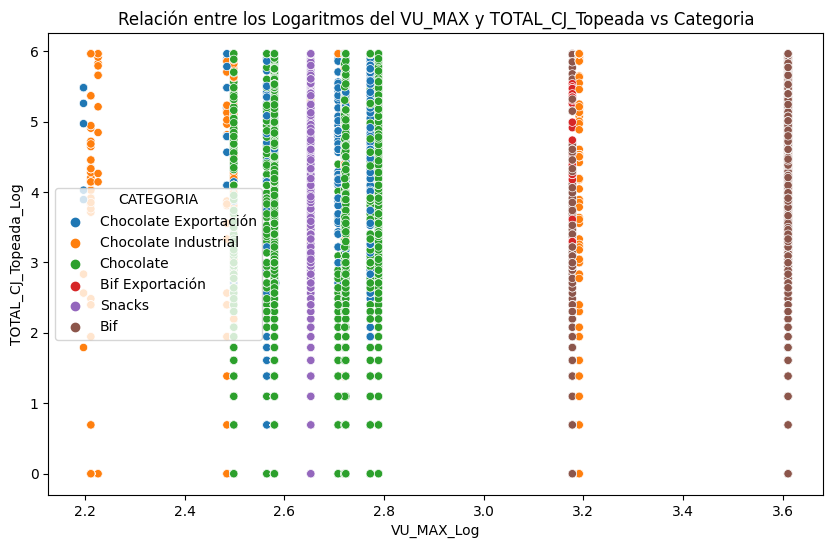

In [160]:
# Visualmente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
            x = 'VU_MAX_Log',
            y = 'TOTAL_CJ_Topeada_Log',
            hue = 'ESTATUS')
plt.title('Relación entre los Logaritmos del VU_MAX y TOTAL_CJ_Topeada vs Estatus')

# Visualmente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
            x = 'VU_MAX_Log',
            y = 'TOTAL_CJ_Topeada_Log',
            hue = 'CATEGORIA')
plt.title('Relación entre los Logaritmos del VU_MAX y TOTAL_CJ_Topeada vs Categoria')

In [161]:
coeficiente = df[['VU_MAX_Log','TOTAL_CJ_Topeada_Log']].corr(method='pearson')
coeficiente

VU_MAX_Log  TOTAL_CJ_Topeada_Log
VU_MAX_Log              1.000000              0.147765
TOTAL_CJ_Topeada_Log    0.147765              1.000000

Conclusión: No se aprecia relación entre VU_MAX y TOTAL_CJ_Topeada_Log.

RF_MES Esta variable es numerica y del producto. Es cuantitativa.

In [162]:
# Primero genero la variable logaritmica
df['RF_MES_Log'] = np.log(df['RF_MES'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Relación entre los Logaritmos del RF_MES y TOTAL_CJ_Topeada vs Categoria')

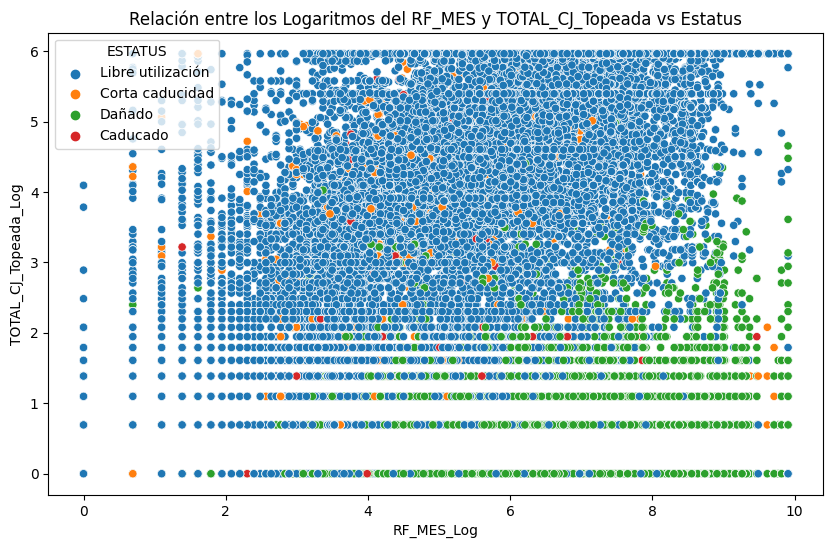

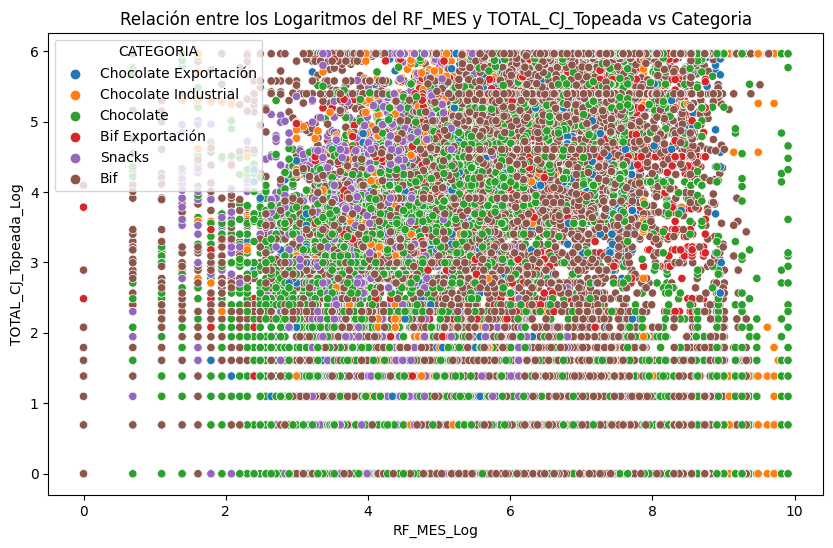

In [284]:
# Visualmente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
            x = 'RF_MES_Log',
            y = 'TOTAL_CJ_Topeada_Log',
            hue = 'ESTATUS')
plt.title('Relación entre los Logaritmos del RF_MES y TOTAL_CJ_Topeada vs Estatus')

# Visualmente
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df,
            x = 'RF_MES_Log',
            y = 'TOTAL_CJ_Topeada_Log',
            hue = 'CATEGORIA')
plt.title('Relación entre los Logaritmos del RF_MES y TOTAL_CJ_Topeada vs Categoria')

In [164]:
coeficiente = df[['RF_MES_Log','TOTAL_CJ_Topeada_Log']].corr(method='pearson')
coeficiente

RF_MES_Log  TOTAL_CJ_Topeada_Log
RF_MES_Log              1.000000              0.156324
TOTAL_CJ_Topeada_Log    0.156324              1.000000

Conclusión: No se aprecia relación entre RF_MES y TOTAL_CJ_Topeada.

Wrapper Feature Selection Forward selection

Con este método quiero evaluar cuales son las mejores features cuantativas para predecir.

In [165]:
# Definir función para hacer la selección de variables
def forward_selection(data, target, significance_level):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(dtype = 'float64',
                             index = remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [214]:
# Matriz de Features
X = df[['AN_CAD','COSTO_UN','COSTO_TOT','MESES_VU',
        'VU_MAX', 'PRCTJ_VU', 'UN_CJ','RF_MES']]
# Target
y = df['TOTAL_CJ']

In [215]:
VARIABLES_ELEGIDAS = forward_selection(data = X,
                                       target = y,
                                       significance_level = 0.01)
print("Quedaron seleccionadas:")
VARIABLES_ELEGIDAS

Quedaron seleccionadas:


['RF_MES',
 'COSTO_TOT',
 'VU_MAX',
 'COSTO_UN',
 'AN_CAD',
 'PRCTJ_VU',
 'MESES_VU',
 'UN_CJ']

In [216]:
print('De ' + str(X.shape[1]) + ' features, se seleccionaron ' + str(len(VARIABLES_ELEGIDAS)))
print("Quedaron afuera:")
elementos_no_en_lista = [x for x in X.columns if x not in VARIABLES_ELEGIDAS]
elementos_no_en_lista

De 8 features, se seleccionaron 8
Quedaron afuera:


[]

In [217]:
initial_features = X.columns.tolist()
best_features = []
initial_features
best_features

[]

In [218]:
len(initial_features)

8

In [219]:
remaining_features = list(set(initial_features)-set(best_features))
remaining_features

['VU_MAX',
 'RF_MES',
 'AN_CAD',
 'PRCTJ_VU',
 'COSTO_TOT',
 'MESES_VU',
 'COSTO_UN',
 'UN_CJ']

In [220]:
new_pval = pd.Series(dtype='float64',
                     index = remaining_features)
for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
new_pval

VU_MAX        3.925927e-53
RF_MES        0.000000e+00
AN_CAD       6.241287e-211
PRCTJ_VU     1.749662e-240
COSTO_TOT     0.000000e+00
MESES_VU     1.369897e-197
COSTO_UN      2.601102e-36
UN_CJ         4.295658e-32
dtype: float64

In [221]:
min_p_value = new_pval.min()
min_p_value

0.0

In [222]:
if(min_p_value<0.01):
            best_features.append(new_pval.idxmin())
best_features

['RF_MES']

Feature selection: Filter Feature Selection
¿Cómo transformo categorías a números?

Método One-Hot-Encoding
Crear una columna binaria para cada categoría en la variable original.

In [175]:
features_categoricas = df.select_dtypes(include=['object'])
features_categoricas.columns

Index(['CEDI_MAT', 'CEDI_MAT_LOT', 'CEDI_MAT_LOT_EST', 'PLANTA', 'CEDI',
       'ALMACEN', 'MATERIAL', 'DESCRIPCION', 'LOTE', 'ESTATUS', 'MES_CAD',
       'CATEGORIA', 'CATEGORIA_FIN', 'RESPONSABLE', 'ACCION'],
      dtype='object')

In [176]:
# Cuántos valores distintos tiene cada categoría?
valores_distintos = features_categoricas.nunique()
print(valores_distintos.sort_values(ascending=False))

CEDI_MAT_LOT_EST    18217
CEDI_MAT_LOT        16094
CEDI_MAT             2026
LOTE                 1811
DESCRIPCION           914
MATERIAL              529
MES_CAD                12
ACCION                 12
CEDI                   10
RESPONSABLE            10
ALMACEN                 9
CATEGORIA               6
CATEGORIA_FIN           6
ESTATUS                 4
PLANTA                  2
dtype: int64


In [288]:
# Primero las selecciono
col_aTransformar = valores_distintos.index[valores_distintos<=10]
col_aTransformar

Index(['PLANTA', 'CEDI', 'ALMACEN', 'ESTATUS', 'CATEGORIA', 'CATEGORIA_FIN',
       'RESPONSABLE'],
      dtype='object')

In [289]:
# Para transformarlas, vamos a usar el método get_dummies de pandas:
df_dummies = pd.get_dummies(df[col_aTransformar], drop_first=True) * 1
df_dummies.head()

PLANTA_AKMT  CEDI_MT21  CEDI_MT22  CEDI_MT23  CEDI_MT24  CEDI_MT25  \
0            0          0          0          0          0          0   
1            0          0          0          0          0          0   
2            0          0          0          0          0          0   
3            0          0          0          0          0          0   
4            0          0          0          0          0          0   

   CEDI_MT26  CEDI_MT27  CEDI_MT28  CEDI_NU90  ...  CATEGORIA_FIN_Sin RF  \
0          0          0          0          1  ...                     0   
1          0          0          0          1  ...                     0   
2          0          0          0          1  ...                     0   
3          0          0          0          1  ...                     0   
4          0          0          0          1  ...                     0   

   RESPONSABLE_Comercial  RESPONSABLE_Edgar  RESPONSABLE_Humberto  \
0                      1                  0                     0   
1                      0                  0                     0   
2                      0                  0                     0   
3                      0                  0                     0   
4                      0                  0                     0   

   RESPONSABLE_Jesica  RESPONSABLE_Nancy  RESPONSABLE_Oscar  \
0                   0                  0                  0   
1                   0                  0                  0   
2                   0                  0                  1   
3                   0                  0                  1   
4                   0                  0                  0   

   RESPONSABLE_Renata  RESPONSABLE_Sebastián  RESPONSABLE_Yesika  
0                   0                      0                   0  
1                   0                      1                   0  
2                   0                      0                   0  
3                   0                      0                   0  
4                   0                      1                   0  

[5 rows x 40 columns]

In [290]:
print(df.shape,df_dummies.shape)

(34336, 68) (34336, 40)


In [291]:
# Junto los resultados
df = pd.concat([df, df_dummies], axis=1)
df.head()

FECHA     CEDI_MAT         CEDI_MAT_LOT  \
0 2023-01-31  NU901008121  NU90100812147003987   
1 2023-01-31  NU901011425      NU9010114251322   
2 2023-01-31  NU901011425      NU9010114251322   
3 2023-01-31  NU901011425      NU9010114250344   
4 2023-01-31  NU901011425      NU9010114251422   

                       CEDI_MAT_LOT_EST PLANTA  CEDI ALMACEN MATERIAL  \
0  NU90100812147003987Libre utilización   ABNU  NU90     LAG  1008121   
1        NU9010114251322Corta caducidad   ABNU  NU90     LAG  1011425   
2                 NU9010114251322Dañado   ABNU  NU90     LAG  1011425   
3                 NU9010114250344Dañado   ABNU  NU90     LAG  1011425   
4        NU9010114251422Corta caducidad   ABNU  NU90     LAG  1011425   

                           DESCRIPCION  CADUCIDAD  ... CATEGORIA_FIN_Sin RF  \
0  MUIBON avell 24/15/22g.Display Exp. 2024-04-01  ...                    0   
1     BRR. MILCH AVELL  1/250/22G 4605 2023-06-30  ...                    0   
2     BRR. MILCH AVELL  1/250/22G 4605 2023-06-30  ...                    0   
3     BRR. MILCH AVELL  1/250/22G 4605 2023-07-07  ...                    0   
4     BRR. MILCH AVELL  1/250/22G 4605 2023-07-07  ...                    0   

  RESPONSABLE_Comercial RESPONSABLE_Edgar  RESPONSABLE_Humberto  \
0                     1                 0                     0   
1                     0                 0                     0   
2                     0                 0                     0   
3                     0                 0                     0   
4                     0                 0                     0   

  RESPONSABLE_Jesica  RESPONSABLE_Nancy  RESPONSABLE_Oscar  \
0                  0                  0                  0   
1                  0                  0                  0   
2                  0                  0                  1   
3                  0                  0                  1   
4                  0                  0                  0   

   RESPONSABLE_Renata  RESPONSABLE_Sebastián RESPONSABLE_Yesika  
0                   0                      0                  0  
1                   0                      1                  0  
2                   0                      0                  0  
3                   0                      0                  0  
4                   0                      1                  0  

[5 rows x 108 columns]

ALGORITMOS DE REGRESION

MODELO 1 - FEATURE CON MAYOR CORRELACIÓN

In [181]:
# Estimo coeficientes para modelo de regresión lineal:
model1 = 'TOTAL_CJ_Topeada_Log ~ COSTO_TOT_Log'
lm1 = sm.OLS.from_formula(formula=model1, data=df).fit()
print(lm1.summary())

                             OLS Regression Results                             
Dep. Variable:     TOTAL_CJ_Topeada_Log   R-squared:                       0.815
Model:                              OLS   Adj. R-squared:                  0.815
Method:                   Least Squares   F-statistic:                 1.511e+05
Date:                  Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                          23:37:51   Log-Likelihood:                -45413.
No. Observations:                 34336   AIC:                         9.083e+04
Df Residuals:                     34334   BIC:                         9.085e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.1670  

Text(0.5, 1.0, 'Datos reales vs Estimación')

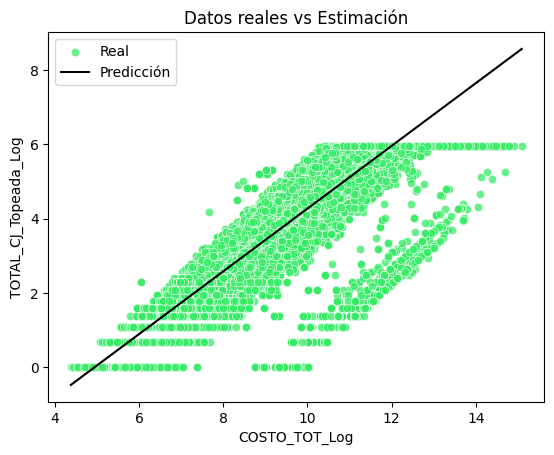

In [182]:
# Graficamente:
df['y_estimado'] = lm1.predict(df)
g1 = plt.figure()
sns.scatterplot(data = df,
                x = 'COSTO_TOT_Log',
                y = 'TOTAL_CJ_Topeada_Log',
                label = 'Real',
                color = '#34EB63',
                alpha = 0.75)
sns.lineplot(data = df,
                x = 'COSTO_TOT_Log',
                y = 'y_estimado',
                label = 'Predicción',
                color = 'black')
plt.xlabel('COSTO_TOT_Log')
plt.ylabel('TOTAL_CJ_Topeada_Log')
plt.title('Datos reales vs Estimación')

In [183]:
coeficientes1 = lm1.params
print('Coeficientes1:')
print(coeficientes1)

Coeficientes1:
Intercept       -4.167005
COSTO_TOT_Log    0.843643
dtype: float64


In [184]:
intervalo_confianza1 = lm1.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza1)

Intervalo de confianza de los coeficientes:
                      0         1
Intercept     -4.205152 -4.128858
COSTO_TOT_Log  0.839389  0.847897


In [185]:
pvalores1 = lm1.pvalues
print('P-Valores:')
print(pvalores1.round(6))

P-Valores:
Intercept        0.0
COSTO_TOT_Log    0.0
dtype: float64


In [186]:
r_cuadrado1 = lm1.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado1.round(3))

Coeficiente de determinación (R-cuadrado): 0.815


MODELO 2 - 2 FEATURES

In [287]:
# Estimo coeficientes para modelo de regresión lineal con 2 features:
model2 = 'TOTAL_CJ_Topeada_Log ~ COSTO_TOT_Log + AN_CAD_Log'
lm2 = sm.OLS.from_formula(formula=model2, data=df).fit()
print(lm2.summary())

                             OLS Regression Results                             
Dep. Variable:     TOTAL_CJ_Topeada_Log   R-squared:                       0.871
Model:                              OLS   Adj. R-squared:                  0.871
Method:                   Least Squares   F-statistic:                 1.163e+05
Date:                  Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                          01:01:36   Log-Likelihood:                -39156.
No. Observations:                 34336   AIC:                         7.832e+04
Df Residuals:                     34333   BIC:                         7.834e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6946.0050  

In [189]:
coeficientes2 = lm2.params
print('Coeficientes2:')
print(coeficientes2)

Coeficientes2:
Intercept       -6946.005039
COSTO_TOT_Log       0.818555
AN_CAD_Log        911.844408
dtype: float64


In [190]:
intervalo_confianza2 = lm2.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza2)

Intervalo de confianza de los coeficientes:
                         0            1
Intercept     -7056.737756 -6835.272323
COSTO_TOT_Log     0.814987     0.822123
AN_CAD_Log      897.299124   926.389692


In [191]:
pvalores2 = lm2.pvalues
print('P-Valores:')
print(pvalores2.round(6))

P-Valores:
Intercept        0.0
COSTO_TOT_Log    0.0
AN_CAD_Log       0.0
dtype: float64


In [192]:
r_cuadrado2 = lm2.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado2.round(3))

Coeficiente de determinación (R-cuadrado): 0.871


MODELO 3 - COMPONENTES PRINCIPALES PARA REDUCIR DIMENSIONALIDAD

In [193]:
df_PCA = df[['RF_MES', 'COSTO_TOT', 'COSTO_UN', 'MESES_VU', 'PRCTJ_VU', 'UN_CJ', 'AN_CAD', 'VU_MAX']]
df_PCA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34336 entries, 0 to 34336
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RF_MES     34336 non-null  int64  
 1   COSTO_TOT  34336 non-null  float64
 2   COSTO_UN   34336 non-null  float64
 3   MESES_VU   34336 non-null  float64
 4   PRCTJ_VU   34336 non-null  float64
 5   UN_CJ      34336 non-null  float64
 6   AN_CAD     34336 non-null  int64  
 7   VU_MAX     34336 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 2.4 MB


In [194]:
# Analizo correlaciones
df_PCA.corr(method='pearson')

RF_MES  COSTO_TOT  COSTO_UN  MESES_VU  PRCTJ_VU     UN_CJ  \
RF_MES     1.000000   0.149604 -0.093163  0.138012  0.133330 -0.068429   
COSTO_TOT  0.149604   1.000000  0.111865 -0.019261  0.115998  0.085579   
COSTO_UN  -0.093163   0.111865  1.000000 -0.185973 -0.036149  0.885396   
MESES_VU   0.138012  -0.019261 -0.185973  1.000000  0.725919 -0.207066   
PRCTJ_VU   0.133330   0.115998 -0.036149  0.725919  1.000000 -0.047232   
UN_CJ     -0.068429   0.085579  0.885396 -0.207066 -0.047232  1.000000   
AN_CAD     0.145829  -0.014276 -0.178932  0.960096  0.712858 -0.197499   
VU_MAX     0.084838  -0.104350 -0.221885  0.870996  0.367713 -0.239930   

             AN_CAD    VU_MAX  
RF_MES     0.145829  0.084838  
COSTO_TOT -0.014276 -0.104350  
COSTO_UN  -0.178932 -0.221885  
MESES_VU   0.960096  0.870996  
PRCTJ_VU   0.712858  0.367713  
UN_CJ     -0.197499 -0.239930  
AN_CAD     1.000000  0.820030  
VU_MAX     0.820030  1.000000

In [195]:
# Extraer la matriz de características
X = df_PCA.values

In [196]:
# Crear un objeto PCA
pca = PCA(n_components = 2)

In [197]:
# Ajustar el modelo PCA a los datos
pca.fit(X)

PCA(n_components=2)

In [198]:
# Obtener las componentes principales
componentes_principales = pca.transform(X)

In [199]:
# Crear un nuevo DataFrame con las componentes principales
df_PCA_final = pd.DataFrame(data = componentes_principales)
df_PCA_final.head()

0          1
0  53024.628901  28.069998
1 -30499.908590   5.011242
2 -39749.011973  17.716133
3 -39450.653800  17.306040
4 -33781.848500   9.519172

NORMALIZANDO DATOS

In [200]:
# Normalizar los datos
scaler = StandardScaler()
X = df_PCA.values
X = scaler.fit_transform(X)

# Sigo el paso a paso
pca = PCA(n_components = 2)

pca.fit(X)

componentes_principales = pca.transform(X)

df_PCA_final_2 = pd.DataFrame(data = componentes_principales)
prefijo = "PC_"
df_PCA_final_2 = df_PCA_final_2.add_prefix(prefijo)
df_PCA_final_2.head()

PC_0      PC_1
0  1.036823  0.009968
1  2.543430 -1.319803
2  2.541935 -1.334812
3  2.512032 -1.317773
4  2.512948 -1.308573

Text(0.5, 1.0, 'Gráfico de Dispersión de las Dos Primeras Componentes Principales')

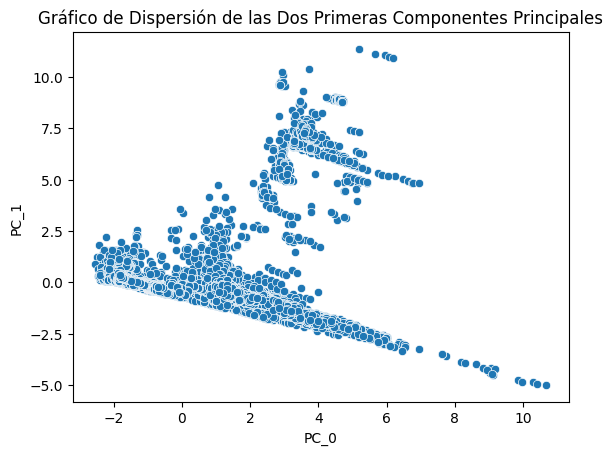

In [201]:
# Grafico de dispersión
plt.figure()
sns.scatterplot(data = df_PCA_final_2,
                x = 'PC_0',
                y = 'PC_1')
plt.title('Gráfico de Dispersión de las Dos Primeras Componentes Principales')

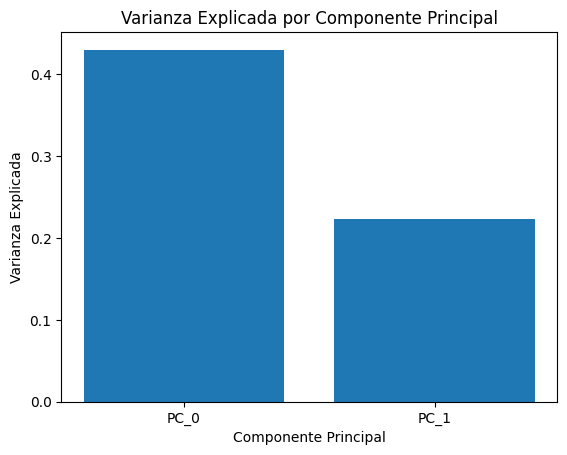

In [202]:
# Visualizar la varianza explicada por cada componente principal en un gráfico de barras
varianza_explicada = pca.explained_variance_ratio_
componentes = df_PCA_final_2.columns

plt.bar(componentes,
        varianza_explicada)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.show()

Text(0.5, 1.0, 'Relación entre componentes y variable target')

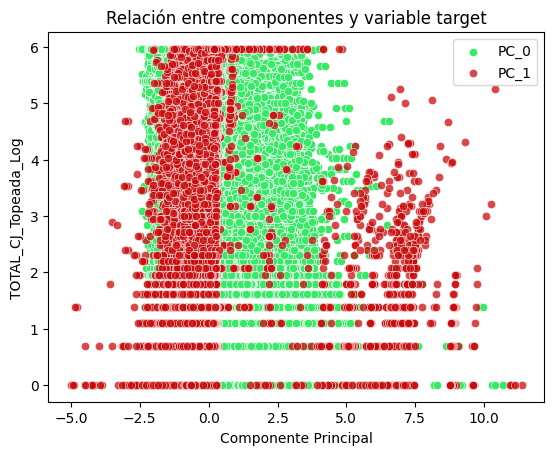

In [203]:
# Relación con el target
df['PC_0'] = df_PCA_final_2['PC_0']
df['PC_1'] = df_PCA_final_2['PC_1']

sns.scatterplot(data = df,
                x = 'PC_0',
                y = 'TOTAL_CJ_Topeada_Log',
               label='PC_0',
               color = '#34EB63',
                alpha = 1)
sns.scatterplot(data = df,
                x = 'PC_1',
                y = 'TOTAL_CJ_Topeada_Log',
                label = 'PC_1',
                color = '#CA0B0B',
                alpha = 0.75)
plt.xlabel('Componente Principal')
plt.ylabel('TOTAL_CJ_Topeada_Log')
plt.title('Relación entre componentes y variable target')

In [204]:
ANALIZAR = df[['RF_MES', 'COSTO_TOT', 'COSTO_UN', 'MESES_VU', 'PRCTJ_VU', 'UN_CJ', 'AN_CAD', 'VU_MAX','PC_0','PC_1','TOTAL_CJ_Topeada_Log']]
print("Coeficientes de Correlación con variable target:")
ANALIZAR.corr(method = 'pearson')['TOTAL_CJ_Topeada_Log'].sort_values(ascending = False)

Coeficientes de Correlación con variable target:


TOTAL_CJ_Topeada_Log    1.000000
PRCTJ_VU                0.392583
COSTO_TOT               0.355069
AN_CAD                  0.337572
MESES_VU                0.331297
VU_MAX                  0.151442
PC_1                    0.048741
RF_MES                  0.024327
COSTO_UN               -0.156629
UN_CJ                  -0.173075
PC_0                   -0.340803
Name: TOTAL_CJ_Topeada_Log, dtype: float64

In [205]:
# Estimo coeficientes para modelo de regresión lineal con una sola variable origen de PCA:
model3 = 'TOTAL_CJ_Topeada_Log ~ PC_1'
lm3 = sm.OLS.from_formula(formula=model3, data=df).fit()
print(lm3.summary())

                             OLS Regression Results                             
Dep. Variable:     TOTAL_CJ_Topeada_Log   R-squared:                       0.002
Model:                              OLS   Adj. R-squared:                  0.002
Method:                   Least Squares   F-statistic:                     81.76
Date:                  Mon, 15 Jan 2024   Prob (F-statistic):           1.62e-19
Time:                          23:40:55   Log-Likelihood:                -74323.
No. Observations:                 34335   AIC:                         1.486e+05
Df Residuals:                     34333   BIC:                         1.487e+05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1539      0.011

Text(0.5, 1.0, 'Datos reales (Componentes Principales) vs Estimación')

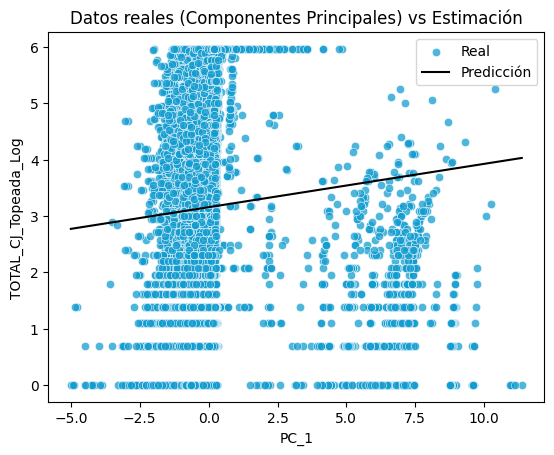

In [206]:
# Graficamente:
df['y_estimado'] = lm3.predict(df)
plt.figure()
sns.scatterplot(data = df,
                x = 'PC_1',
                y = 'TOTAL_CJ_Topeada_Log',
                label = 'Real',
                color = '#129CD0',
                alpha = 0.75)
sns.lineplot(data = df,
                x = 'PC_1',
                y = 'y_estimado',
                label = 'Predicción',
                color = 'black')
plt.xlabel('PC_1')
plt.ylabel('TOTAL_CJ_Topeada_Log')
plt.title('Datos reales (Componentes Principales) vs Estimación')

In [207]:
coeficientes3 = lm3.params
print('Coeficientes3:')
print(coeficientes3)

Coeficientes3:
Intercept    3.153906
PC_1         0.076887
dtype: float64


In [208]:
intervalo_confianza3 = lm3.conf_int()
print("Intervalo de confianza de los coeficientes3:")
print(intervalo_confianza3)

Intervalo de confianza de los coeficientes3:
                  0         1
Intercept  3.131609  3.176204
PC_1       0.060220  0.093554


In [209]:
pvalores3 = lm3.pvalues
print('P-Valores3:')
print(pvalores3.round(6))

P-Valores3:
Intercept    0.0
PC_1         0.0
dtype: float64


In [210]:
r_cuadrado3 = lm3.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado3.round(3))

Coeficiente de determinación (R-cuadrado): 0.002
